# Leitura dos dados

In [51]:
!pip install pandas
!pip install --force-reinstall pytz
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.2
    Uninstalling pytz-2024.2:
      Successfully uninstalled pytz-2024.2



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
data = pd.read_csv('../data/corn/19/corn_prices.csv')
data.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,93,1,19,2021-06-21,149.338669,150.234216,148.208432,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,124,1,19,2021-07-28,164.489329,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,148,1,19,2021-06-11,164.090668,164.688168,163.705524,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,168,1,19,2021-07-21,170.239000,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,272,1,19,2021-07-19,168.175763,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [53]:
data.shape

(748, 10)

In [54]:
df = data.copy()

In [55]:
df.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,93,1,19,2021-06-21,149.338669,150.234216,148.208432,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,124,1,19,2021-07-28,164.489329,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,148,1,19,2021-06-11,164.090668,164.688168,163.705524,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,168,1,19,2021-07-21,170.239000,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,272,1,19,2021-07-19,168.175763,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [56]:
df.sort_values(by='date', inplace=True)
df = df.iloc[:-3]
df.tail()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
740,67622,1,19,2024-04-08,113.199933,NaN,NaN,2024-04-08 20:27:15,NaN,2024-04-09 14:50:11
741,67673,1,19,2024-04-09,113.324830,NaN,NaN,2024-04-09 20:26:54,NaN,2024-04-10 12:19:18
742,67724,1,19,2024-04-10,113.733695,NaN,NaN,2024-04-10 20:26:31,NaN,2024-04-11 12:22:07
743,67775,1,19,2024-04-11,113.162535,NaN,NaN,2024-04-11 20:27:47,NaN,2024-04-12 12:17:57
744,67826,1,19,2024-04-12,113.252443,NaN,NaN,2024-04-12 20:27:06,NaN,2024-04-15 12:19:57


In [57]:
df = df.groupby(['product_id', 'main_location_id', 'date']).agg({
    'id': 'last',
    'avg_price': 'mean',  # Média de avg_price
    'ask': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para ask
    'bid': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para bid
    'created_at': 'first',  # Primeiro valor de created_at
    'main_location': 'first',  # Primeiro valor de main_location
    'updated_at': 'first'  # Primeiro valor de updated_at
}).reset_index()
df['ask'] = df['ask'].interpolate(method='polynomial', order=2, limit_direction='both')
df['bid'] = df['bid'].interpolate(method='polynomial', order=2, limit_direction='both')
df['avg_price'] = df['avg_price'].interpolate(method='polynomial', order=2, limit_direction='both')

df['ask'] = df['ask'].fillna(method='bfill')
df['bid'] = df['bid'].fillna(method='bfill')
df['avg_price'] = df['avg_price'].fillna(method='bfill')

df.head()

C:\Users\gui_h\AppData\Local\Temp\ipykernel_9844\3619415322.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ask'] = df['ask'].fillna(method='bfill')
C:\Users\gui_h\AppData\Local\Temp\ipykernel_9844\3619415322.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bid'] = df['bid'].fillna(method='bfill')
C:\Users\gui_h\AppData\Local\Temp\ipykernel_9844\3619415322.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['avg_price'] = df['avg_price'].fillna(method='bfill')


,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
0,1,19,2021-03-09,1408,162.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,1,19,2021-03-10,1034,162.550000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,1,19,2021-03-29,902,159.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,1,19,2021-06-01,1241,167.011668,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,1,19,2021-06-02,1045,168.536667,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [58]:
df.shape

(735, 10)

In [59]:
df.index = df['date']
df.head()

,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,,
2021-03-09,1,19,2021-03-09,1408,162.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-10,1,19,2021-03-10,1034,162.550000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-29,1,19,2021-03-29,902,159.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,1,19,2021-06-01,1241,167.011668,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,1,19,2021-06-02,1045,168.536667,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [60]:
df.drop('date', axis=1, inplace=True)
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-03-09,1,19,1408,162.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-10,1,19,1034,162.550000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-29,1,19,902,159.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,1,19,1241,167.011668,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,1,19,1045,168.536667,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


# Análise descritiva da série temporal

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
descriptive_stats = df[["avg_price", "ask", "bid"]].describe()
descriptive_stats

,avg_price,ask,bid
count,735.000000,697.000000,697.000000
mean,151.933290,155.334386,153.096973
std,22.808726,21.387576,20.970203
min,104.541610,108.055239,106.111053
25%,131.598547,134.458943,132.265046
50%,160.266323,163.605694,160.860758
75%,170.416667,172.384491,169.344758
max,190.123332,192.187283,189.424790


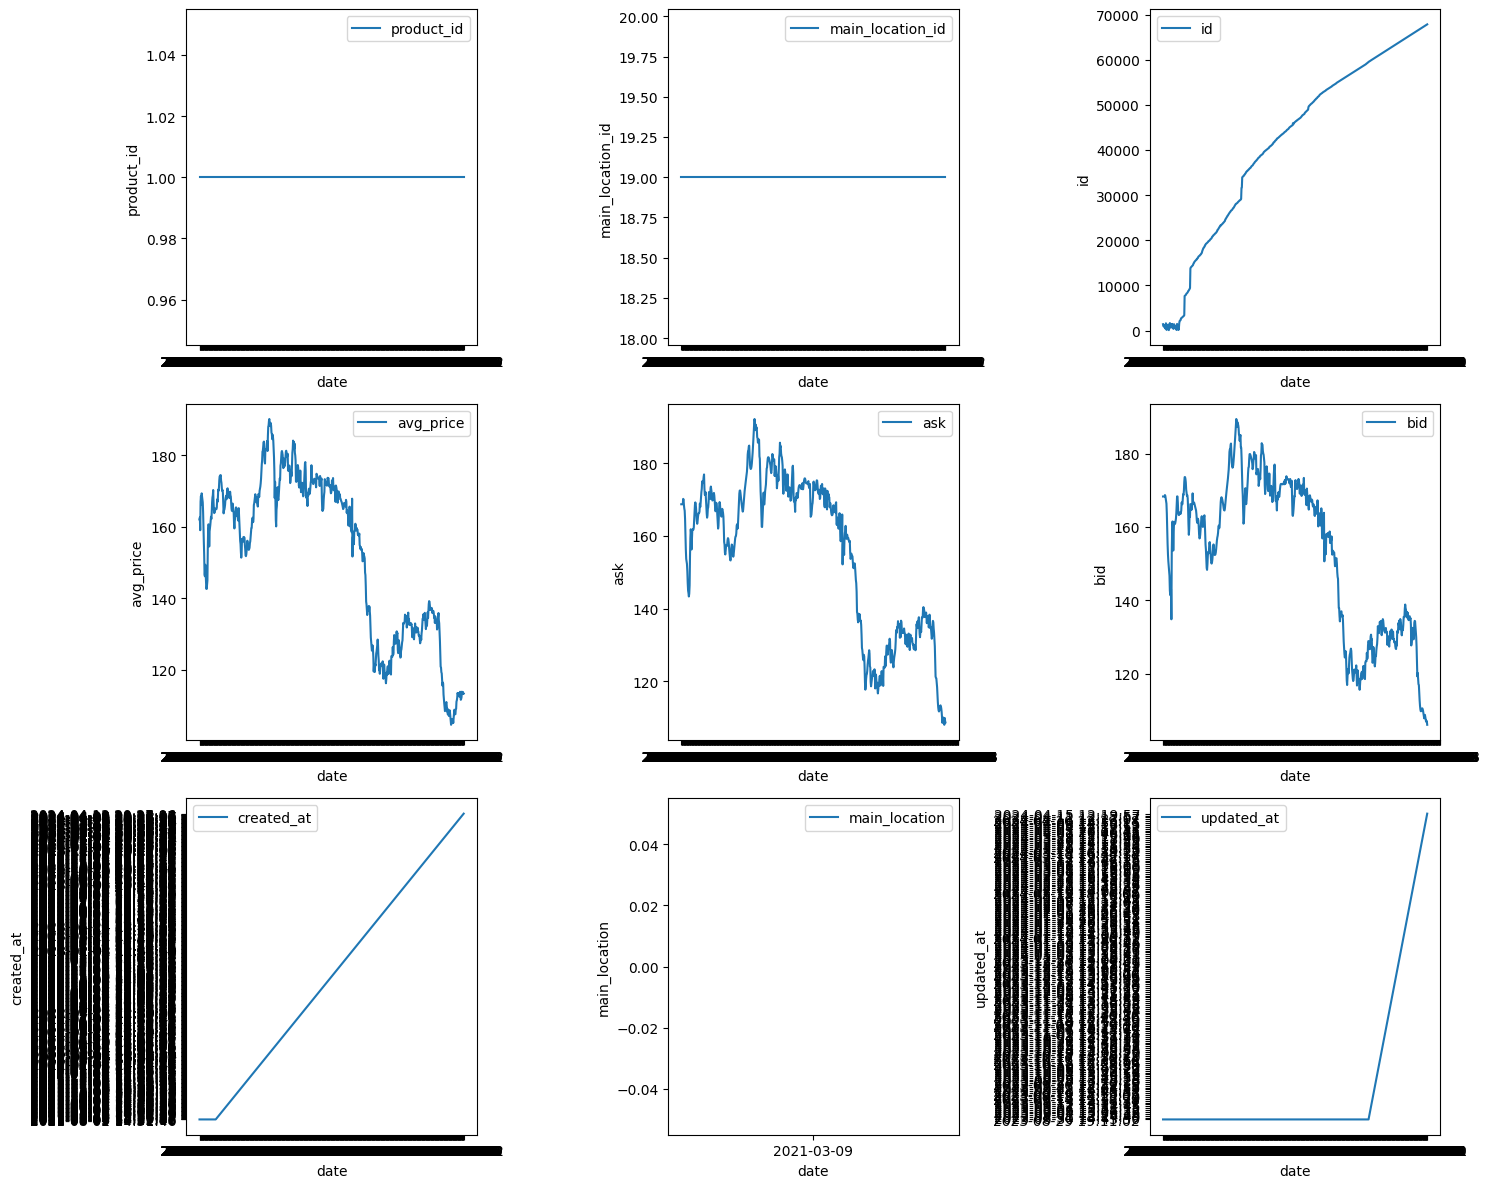

In [63]:
import math

num_columns = len(df.columns)

cols = 3  
rows = math.ceil(num_columns / cols)  

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.plot(df[column], label=column)
    plt.xlabel('date')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

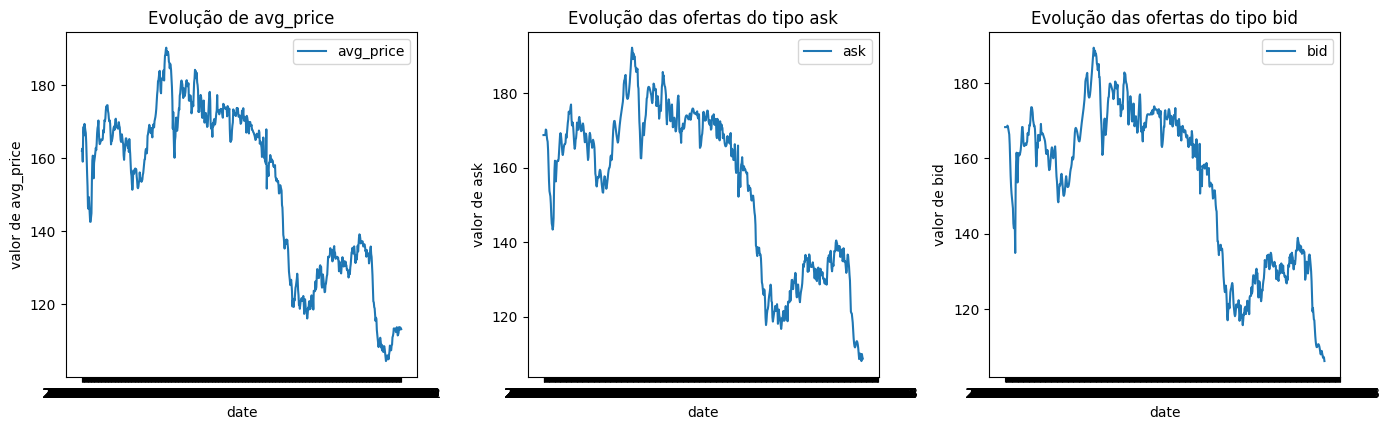

In [64]:
# Séries temporais de avg_price, ask e bid
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(df['avg_price'], label='avg_price')
plt.title('Evolução de avg_price')
plt.xlabel('date')
plt.ylabel('valor de avg_price')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df['ask'], label='ask')
plt.title('Evolução das ofertas do tipo ask')
plt.xlabel('date')
plt.ylabel('valor de ask')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df['bid'], label='bid')
plt.title('Evolução das ofertas do tipo bid')
plt.xlabel('date')
plt.ylabel('valor de bid')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
selected_columns = ['avg_price', 'ask', 'bid']
correlation_matrix = df[selected_columns].corr()
correlation_matrix

,avg_price,ask,bid
avg_price,1.000000,0.998373,0.998014
ask,0.998373,1.000000,0.997627
bid,0.998014,0.997627,1.000000


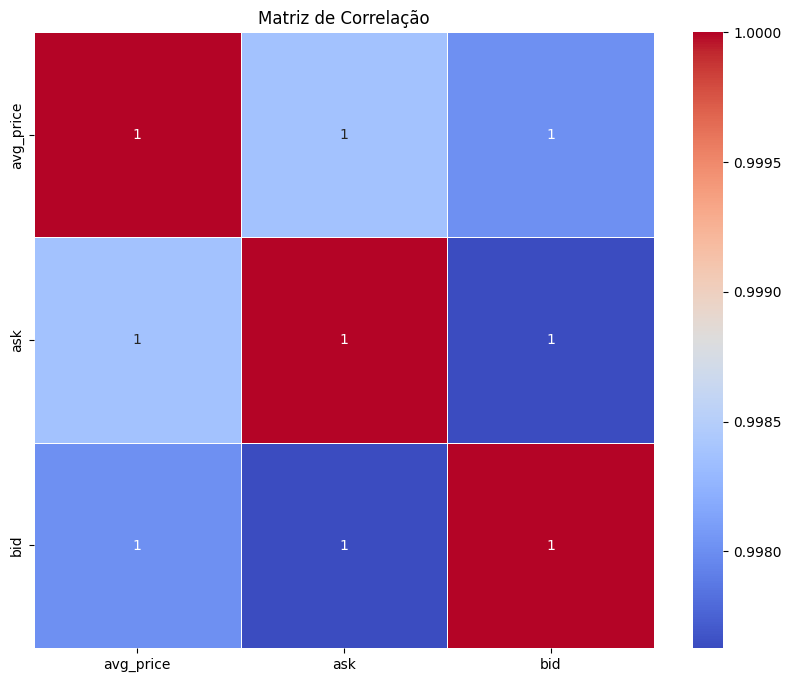

In [66]:


# Matrix de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Análisis de Estacionariedad

In [67]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller, kpss


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# Augmented Dickey-Fuller Test (ADF) e Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
def stationarity_tests(timeseries, series_name):
    print(f"Resultados para test ADF {series_name}:")
    adf_test = adfuller(timeseries)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    for key, value in adf_test[4].items():
        print(f'Critical Value ({key}): {value}')
    print()



In [69]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [70]:
relevant_columns = ['avg_price']

df_interpolated = df[relevant_columns].copy()

for serie in relevant_columns:
    print(f"Analisando a série: {serie}")
    # Verifica se a série é constante
    if df_interpolated[serie].nunique() > 1:  # Garante que haja variabilidade na série
        stationarity_tests(df_interpolated[serie], serie)
    else:
        print(f"A série {serie} é constante e foi ignorada.")


Analisando a série: avg_price
Resultados para test ADF avg_price:
ADF Statistic: -0.5204673693052124
p-value: 0.8879601629588878
Critical Value (1%): -3.439290485895927
Critical Value (5%): -2.8654856985173414
Critical Value (10%): -2.568871126669587



# Transformação de séries não estacionárias


In [71]:
# Função para aplicar diferenciação e testar estacionariedade
def difference_and_test_stationarity(series, series_name, diff_order=1):
    differenced_series = series.diff(diff_order).dropna()

    # ADF test na série diferenciada
    adf_result = adfuller(differenced_series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'ADF result para série diferenciada {series_name}:')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}\n')

    return differenced_series



In [72]:
# transformando e verificando estacionariedade da série temporal
transformed_series = {}
key_columns = ['avg_price', 'ask', 'bid']
for series_name in key_columns:
    print(f'Transformando a série: {series_name}')
    transformed_series[series_name] = difference_and_test_stationarity(df[series_name], series_name)

Transformando a série: avg_price
ADF result para série diferenciada avg_price:
ADF Statistic: -17.831137087459624
p-value: 3.1329927742857452e-30
Critical Value (1%): -3.439314999916068

Critical Value (5%): -2.8654965012008677

Critical Value (10%): -2.5688768817372867

Transformando a série: ask
ADF result para série diferenciada ask:
ADF Statistic: -21.802336718192066
p-value: 0.0
Critical Value (1%): -3.439794053189972

Critical Value (5%): -2.8657075899001314

Critical Value (10%): -2.56898934061384

Transformando a série: bid
ADF result para série diferenciada bid:
ADF Statistic: -23.110902745146788
p-value: 0.0
Critical Value (1%): -3.439794053189972

Critical Value (5%): -2.8657075899001314

Critical Value (10%): -2.56898934061384



In [73]:
# df estacionário
transformed_series.keys()

dict_keys(['avg_price', 'ask', 'bid'])

In [74]:
df_estacionarias = pd.DataFrame(transformed_series)
df_estacionarias

,avg_price,ask,bid
date,,,
2021-03-10,0.550000,0.00000,0.00000
2021-03-29,-3.550000,0.00000,0.00000
2021-06-01,8.011668,0.00000,0.00000
2021-06-02,1.524999,0.00000,0.00000
2021-06-04,-2.361334,1.48229,0.38932
...,...,...,...
2024-04-08,-0.599612,NaN,NaN
2024-04-09,0.124897,NaN,NaN
2024-04-10,0.408865,NaN,NaN


# Decomposição da série (tendencia, Sazonalidade e ruído)

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Função para decompor e plotar as séries temporais
def decompose_series(series, series_name, model='additive', freq=365):
    decomposition = seasonal_decompose(series, model=model, period=freq)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observada')
    ax1.set_title(f'Decomposição da série {series_name}')

    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendencia')

    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Sazonalidade')

    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    return decomposition

Deconposição ADITIVA: avg_price


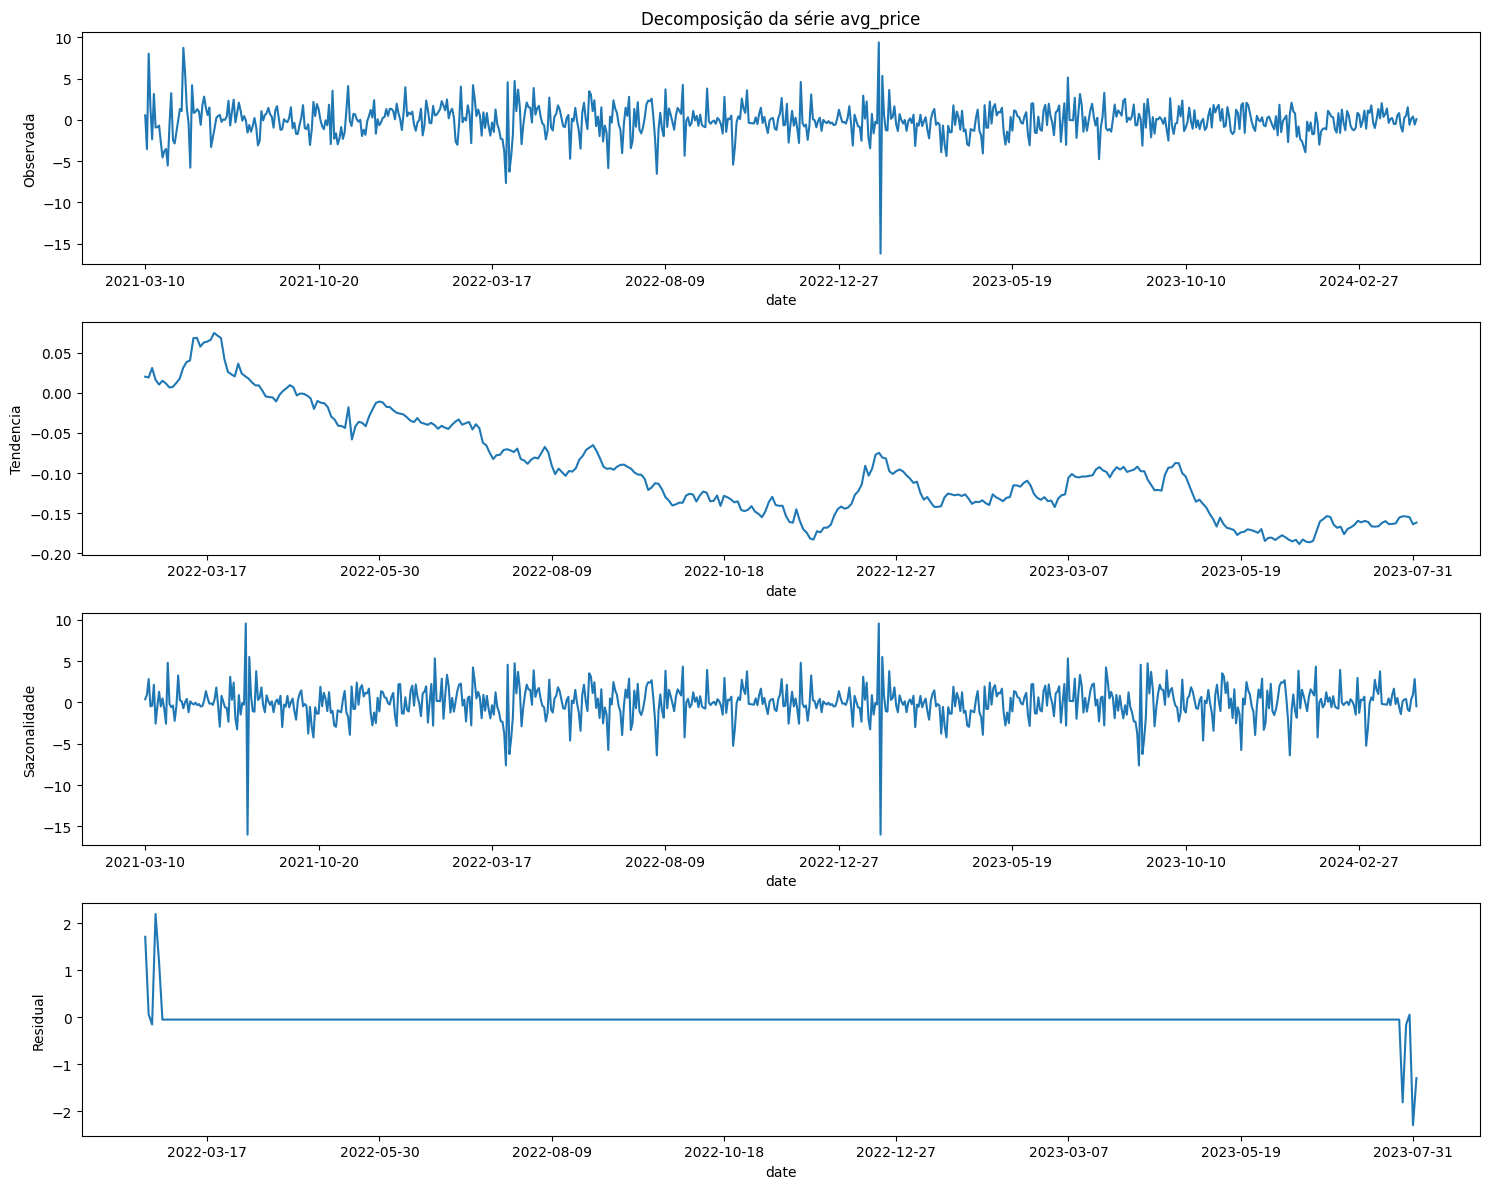

Deconposição ADITIVA: ask


ValueError: This function does not handle missing values

In [76]:
# Aplicando a função de decomposição da série

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Deconposição ADITIVA: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


Deconposição MULTIPLICATIVA: avg_price


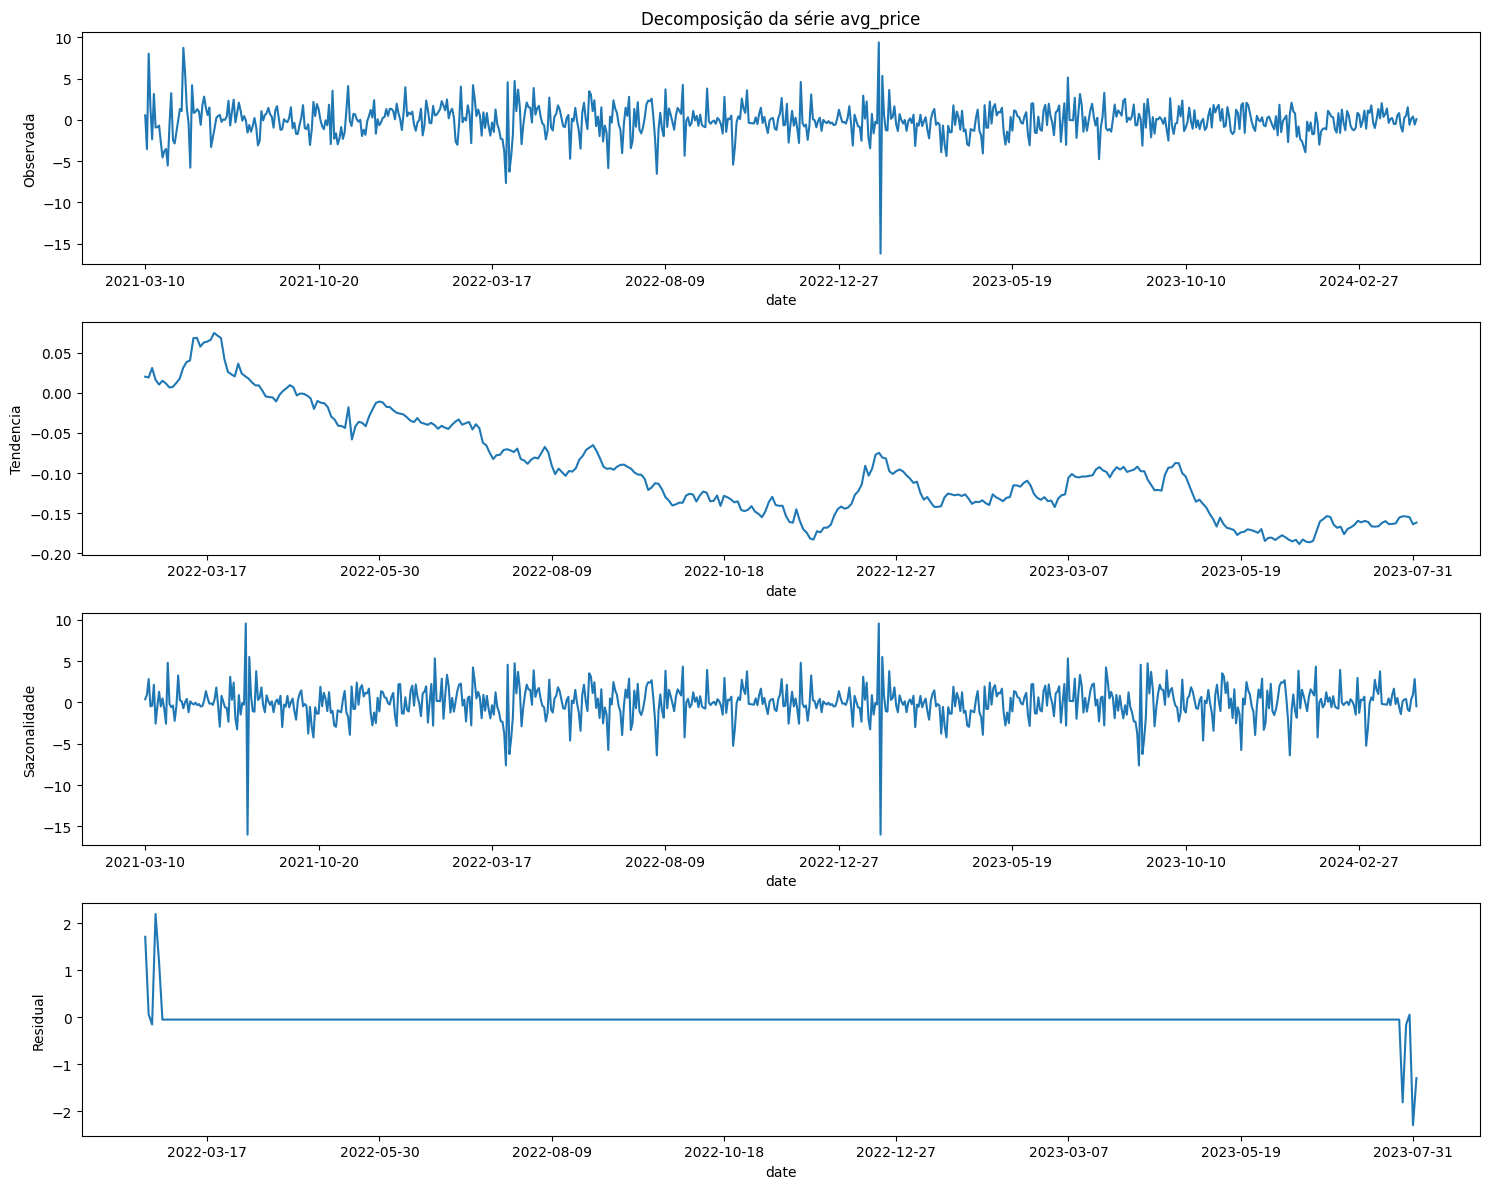

Deconposição MULTIPLICATIVA: ask


ValueError: This function does not handle missing values

In [ ]:
# Aplicando a função de decomposição da série

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Deconposição MULTIPLICATIVA: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


# Análise de Autocorrelação e Autocorrelação parcial

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Análise: avg_price


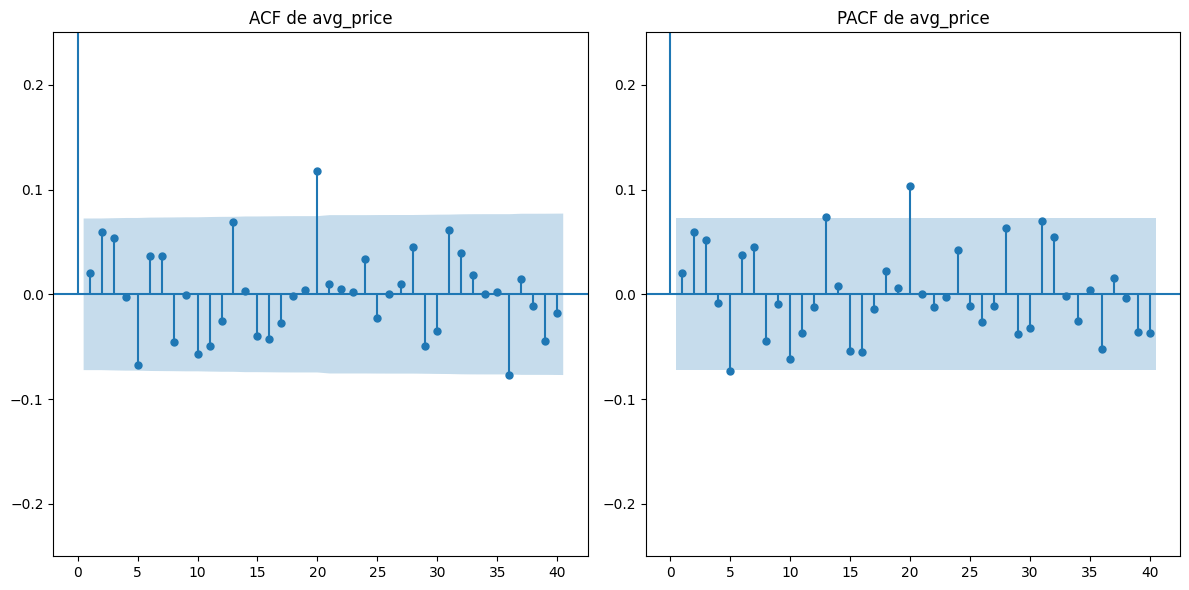

Análise: ask


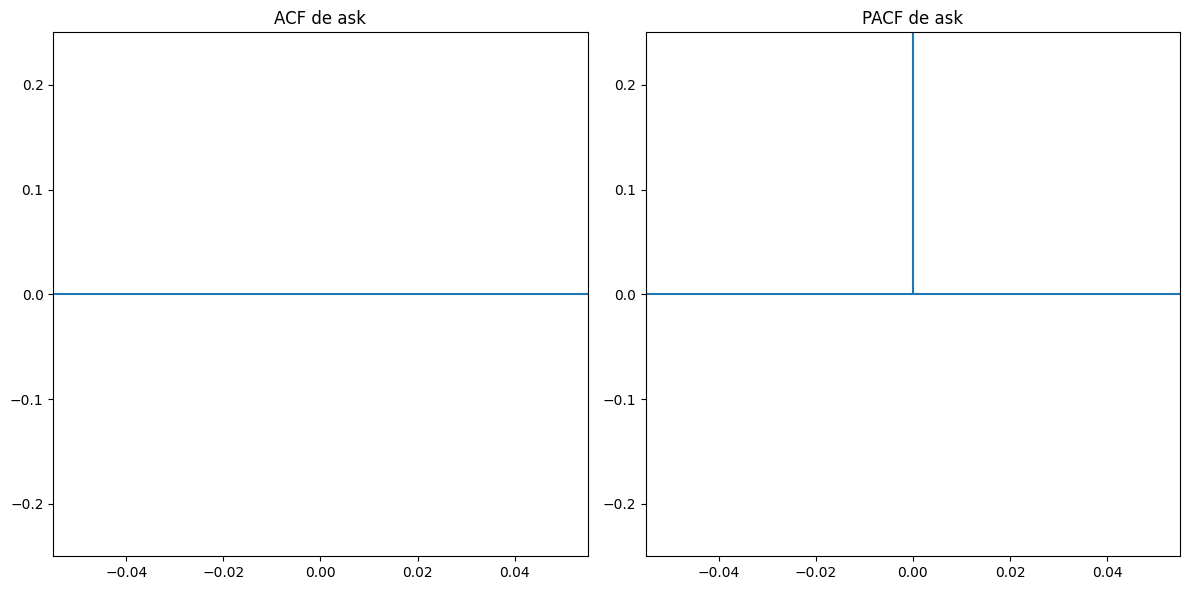

Análise: bid


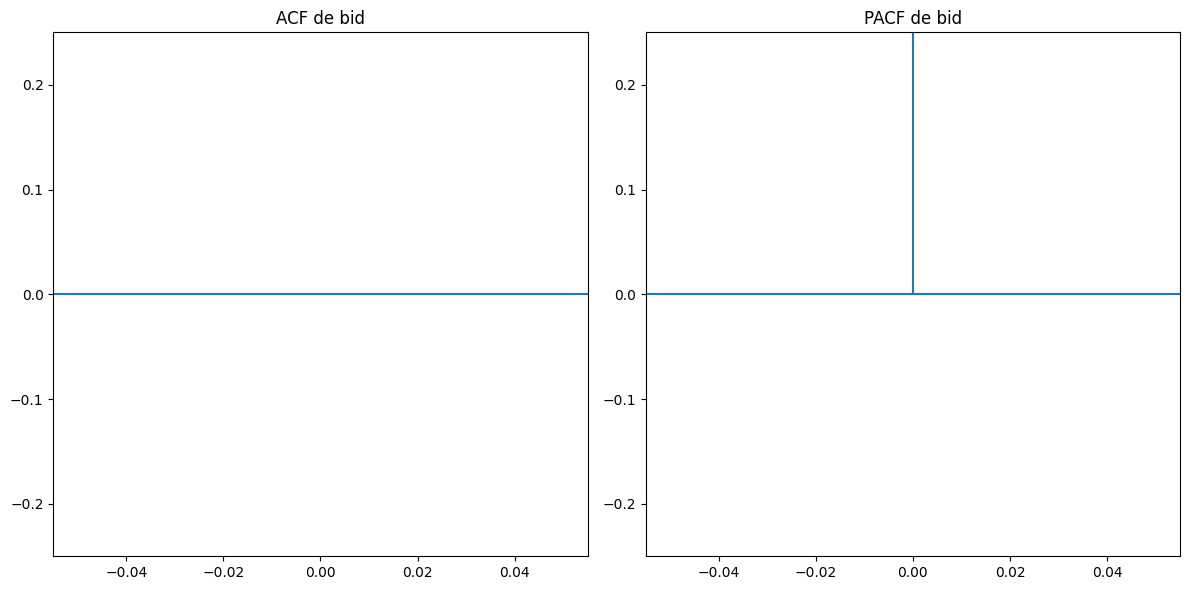

In [ ]:
series_to_analyze = df_estacionarias.columns

# ACF e PACF function
def plot_acf_pacf(series, series_name, lags=40):
    plt.figure(figsize=(12, 6))

    # Gráfico de ACF
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.ylim(-0.25, 0.25)
    plt.title(f'ACF de {series_name}')

    # Gráfico de PACF
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), method='ywm')
    plt.ylim(-0.25, 0.25)
    plt.title(f'PACF de {series_name}')


    plt.tight_layout()
    plt.show()

# ACF e PACF para série diferenciada
for series_name in series_to_analyze:
    print(f'Análise: {series_name}')
    series = df_estacionarias[series_name]
    plot_acf_pacf(series, series_name)

# Modelado ARIMA

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df_estacionarias.head()

,avg_price,ask,bid
date,,,
2021-03-10,0.550000,0.00000,0.00000
2021-03-29,-3.550000,0.00000,0.00000
2021-06-01,8.011668,0.00000,0.00000
2021-06-02,1.524999,0.00000,0.00000
2021-06-04,-2.361334,1.48229,0.38932


## ARIMA

In [ ]:
# df_avg_price_diff = df_estacionarias['avg_price']

# # Identificador de possíveis valores de p e q
# p_values = range(0, 4)
# q_values = range(0, 4)

# # obter melhores valores de p, d, q utilizando AIC
# best_aic = np.inf
# best_order = None
# best_mdl = None

# for p in p_values:
#     for q in q_values:
#         try:
#             tmp_mdl = ARIMA(df_avg_price_diff, order=(p, 0, q)).fit()
#             tmp_aic = tmp_mdl.aic
#             if tmp_aic < best_aic:
#                 best_aic = tmp_aic
#                 best_order = (p, 0, q)
#                 best_mdl = tmp_mdl
#         except Exception as e:
#             print(f'ARIMA{p} falhou com erro: {e}')
#             continue

# print(f'O melhor modelo de arima é: ARIMA{best_order} con AIC={best_aic}')
# print(best_mdl.summary())


from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Série diferenciada de avg_price
df_avg_price_diff = df_estacionarias['avg_price']

# Identificar possíveis valores de p e q
p_values = range(0, 4)
q_values = range(0, 4)

# Lista para armazenar os melhores modelos
best_models = []

# Testar combinações de p e q e salvar os 5 melhores com base no AIC
for p in p_values:
    for q in q_values:
        try:
            # Ajustar o modelo ARIMA
            tmp_mdl = ARIMA(df_avg_price_diff, order=(p, 0, q)).fit()
            tmp_aic = tmp_mdl.aic
            best_models.append((tmp_aic, (p, 0, q), tmp_mdl))
        except Exception as e:
            print(f'ARIMA({p},0,{q}) falhou com erro: {e}')
            continue

# Ordenar os modelos pelo AIC e pegar os 5 melhores
best_models.sort(key=lambda x: x[0])  # Ordena pelo AIC
top_5_models = best_models[:5]  # Seleciona os 5 melhores

# Exibir os 5 melhores modelos
for i, (aic, order, model) in enumerate(top_5_models, 1):
    print(f"\nTop {i}: ARIMA{order} com AIC={aic}")
    print(model.summary())



c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro


Top 1: ARIMA(2, 0, 2) com AIC=3012.176807635181
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  734
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1500.088
Date:                Mon, 11 Nov 2024   AIC                           3012.177
Time:                        21:30:38   BIC                           3039.768
Sample:                             0   HQIC                          3022.819
                                - 734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0673      0.075     -0.896      0.370      -0.214       0.080
ar.L1          1.0435      0.033     31.532      0.000       0.979       1.108
ar.

In [ ]:
# print(best_order)
# Print das ordens dos 5 melhores modelos
print("Ordens dos 5 melhores modelos ARIMA:")
for i, (aic, order, model) in enumerate(top_5_models, 1):
    print(f"Top {i}: ARIMA{order}")


Ordens dos 5 melhores modelos ARIMA:
Top 1: ARIMA(2, 0, 2)
Top 2: ARIMA(3, 0, 2)
Top 3: ARIMA(2, 0, 3)
Top 4: ARIMA(3, 0, 3)
Top 5: ARIMA(0, 0, 0)



Diagnóstico de resíduos para o Top 1 - ARIMA(2, 0, 2) com AIC=3012.176807635181


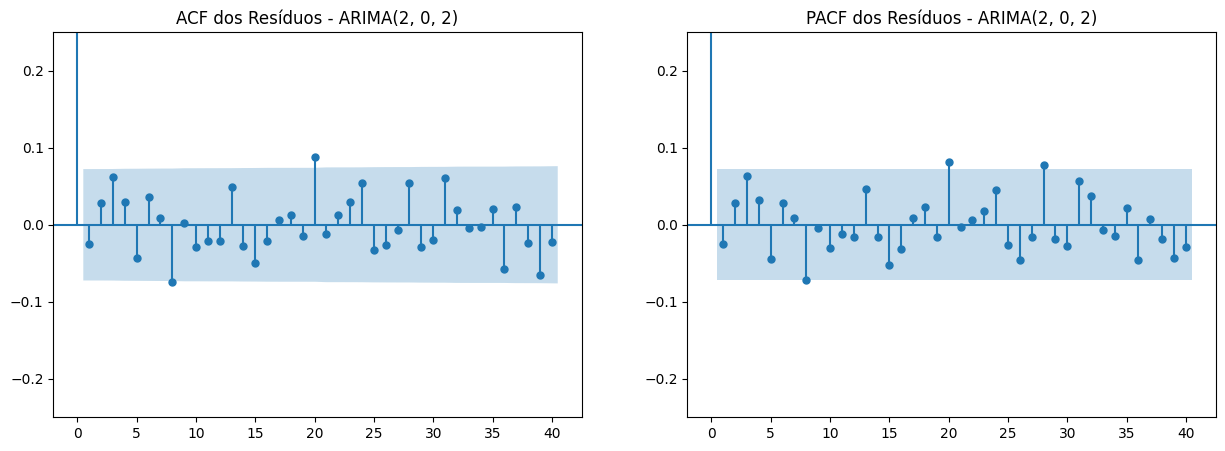


Diagnóstico de resíduos para o Top 2 - ARIMA(3, 0, 2) com AIC=3013.2730684657154


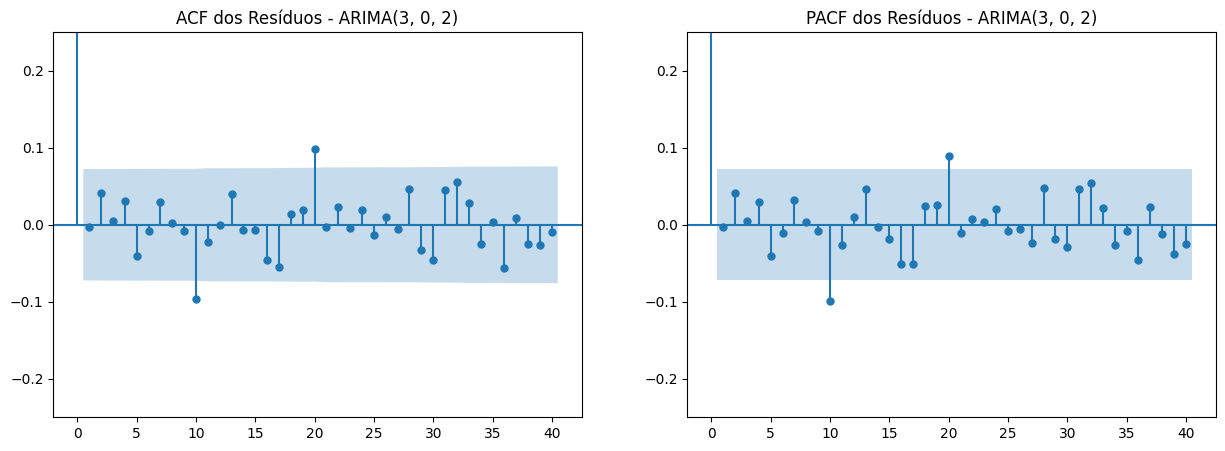


Diagnóstico de resíduos para o Top 3 - ARIMA(2, 0, 3) com AIC=3013.6818639757776


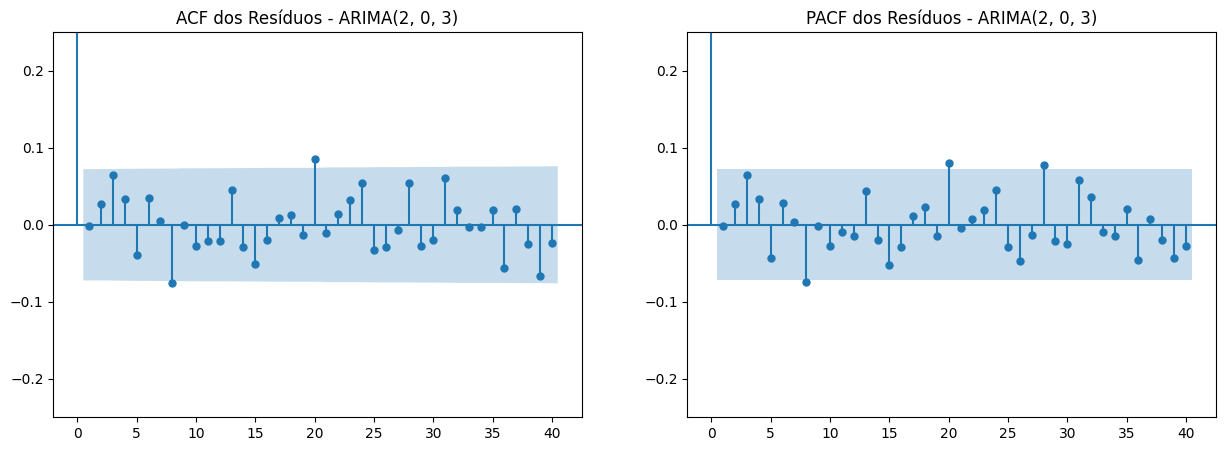


Diagnóstico de resíduos para o Top 4 - ARIMA(3, 0, 3) com AIC=3013.900358238513


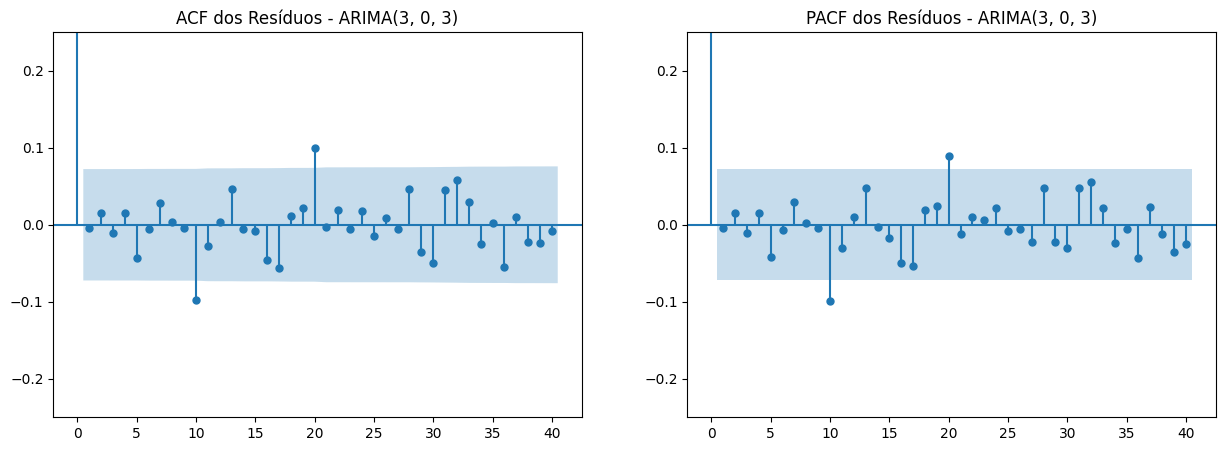


Diagnóstico de resíduos para o Top 5 - ARIMA(0, 0, 0) com AIC=3017.7014328493724


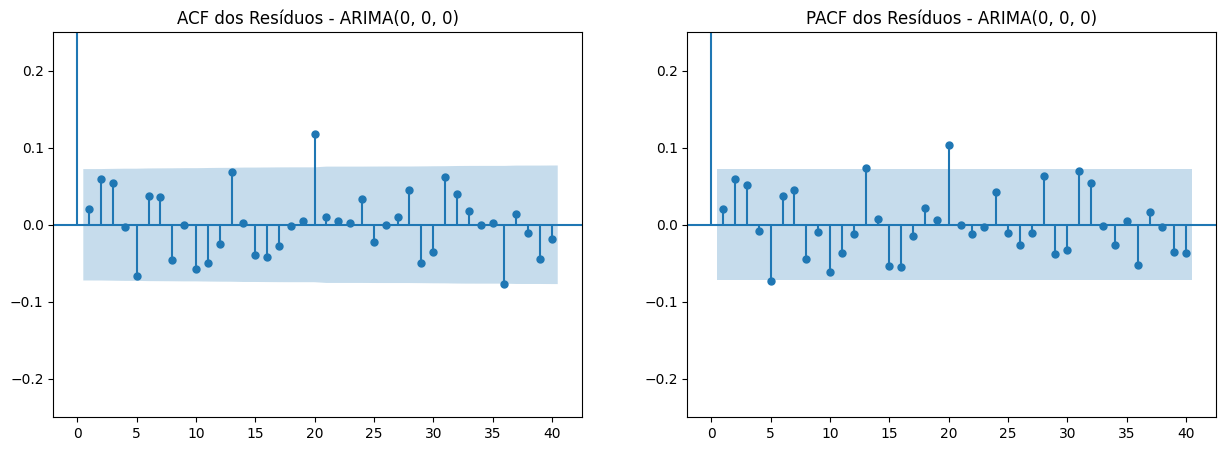

In [ ]:
# # Diagnóstico de residuos
# residuals = best_mdl.resid
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
# ax[0].set_ylim(-0.25, 0.25) 
# fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
# ax[1].set_ylim(-0.25, 0.25)  
# plt.show()
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loop para diagnóstico dos resíduos dos 5 melhores modelos
for i, (aic, order, model) in enumerate(top_5_models, 1):
    print(f"\nDiagnóstico de resíduos para o Top {i} - ARIMA{order} com AIC={aic}")
    
    # Resíduos do modelo
    residuals = model.resid
    
    # Plot ACF e PACF
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
    ax[0].set_ylim(-0.25, 0.25)
    ax[0].set_title(f"ACF dos Resíduos - ARIMA{order}")

    sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
    ax[1].set_ylim(-0.25, 0.25)
    ax[1].set_title(f"PACF dos Resíduos - ARIMA{order}")

    plt.show()


## Autoarima

In [ ]:
!pip install pmdarima


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3011.045, Time=1.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3016.612, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3018.264, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3018.301, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3018.287, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3018.578, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3012.084, Time=1.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3012.596, Time=3.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3018.360, Time=0.86 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3018.829, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3019.494, Time=1.24 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3012.615, Time=2.66 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3013.103, Time=1.52 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 14.229 seconds
                     

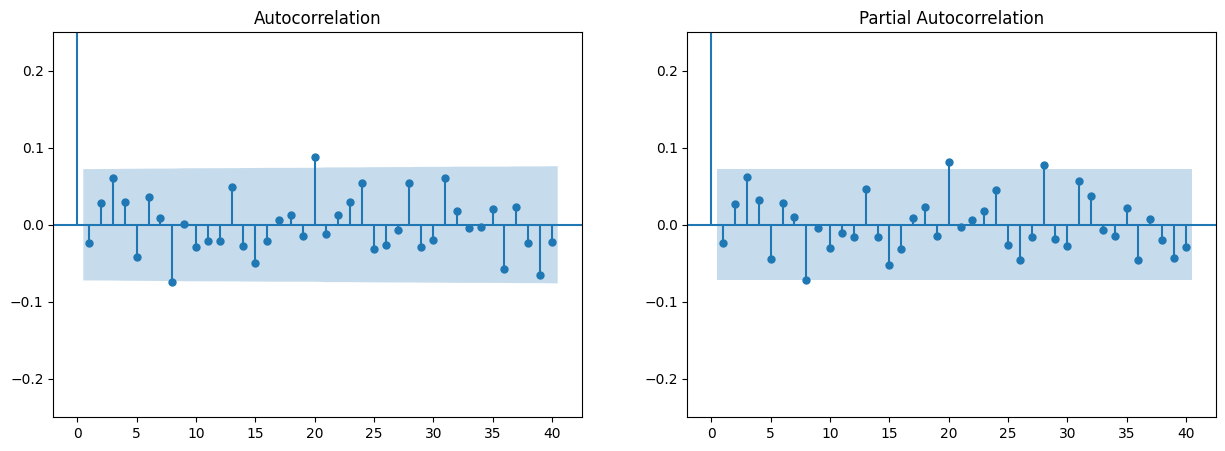

In [ ]:
# Selecionar avg_price por diferenciação
df_avg_price_diff = df_estacionarias['avg_price']

# Aplicar AUTOARIMA
model = auto_arima(df_avg_price_diff, seasonal=False, stepwise=True, trace=True)

# resumo do modelo selecionado
print(model.summary())

# Diagnóstico de residuos
residuals = model.resid()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25)  # limites de y
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  #limites de y
plt.show()

# Modelo ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# df serie orginal
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-03-09,1,19,1408,162.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-10,1,19,1034,162.550000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-03-29,1,19,902,159.000000,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,1,19,1241,167.011668,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,1,19,1045,168.536667,168.731967,168.311542,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [ ]:
# df_avg_price_diff = df_estacionarias['avg_price']

# # Divisão treinamento e teste
# train_size = int(len(df_avg_price_diff) * 0.7) # utilizando 70% dos dados para treinamento e 30% para teste
# train, test = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]

# model = ARIMA(train, order=best_order) # tupla com os melhores valores (2, 0, 1)
# model_fit = model.fit()

# # Predição no conjunto de prova
# start = len(train)
# end = len(train) + len(test) - 1
# predictions_diff = model_fit.predict(start=start, end=end, dynamic=True)

# # série original
# df_avg_price_original = df['avg_price']

# # Série vazia para previsões invertidas
# predictions = pd.Series(index=test.index, dtype=float)

# # Reverter a diferenciação  utilizando os valores da serie original
# for i in range(len(predictions_diff)):
#     if i == 0:
#         predictions.iloc[i] = df_avg_price_original.iloc[train_size] + predictions_diff.iloc[i]
#     else:
#         predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]


from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Série diferenciada de avg_price
df_avg_price_diff = df_estacionarias['avg_price']

# Divisão entre treinamento e teste
train_size = int(len(df_avg_price_diff) * 0.7)  # 70% para treinamento e 30% para teste
train, test = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]

# Série original para reverter a diferenciação
df_avg_price_original = df['avg_price']

# Dicionários para armazenar previsões e modelos
model_predictions = {}
trained_models = {}

# Aplicar cada ordem dos 5 melhores modelos
for i, (aic, best_order, model_fit) in enumerate(top_5_models, 1):
    print(f"\nTreinando e testando com o modelo Top {i} - ARIMA{best_order} com AIC={aic}")
    
    # Treinar o modelo com a ordem especificada
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()
    
    # Armazenar o modelo treinado
    trained_models[best_order] = model_fit
    
    # Prever no conjunto de teste
    start = len(train)
    end = len(train) + len(test) - 1
    predictions_diff = model_fit.predict(start=start, end=end, dynamic=True)
    
    # Série vazia para previsões invertidas
    predictions = pd.Series(index=test.index, dtype=float)

    # Reverter a diferenciação usando a série original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df_avg_price_original.iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Armazenar previsões
    model_predictions[best_order] = predictions

# Agora os modelos e as previsões estão prontos para uso
print("Treinamento e predições concluídos para os 5 melhores modelos.")




Treinando e testando com o modelo Top 1 - ARIMA(2, 0, 2) com AIC=3012.176807635181


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin


Treinando e testando com o modelo Top 2 - ARIMA(3, 0, 2) com AIC=3013.2730684657154


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov


Treinando e testando com o modelo Top 3 - ARIMA(2, 0, 3) com AIC=3013.6818639757776


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov


Treinando e testando com o modelo Top 4 - ARIMA(3, 0, 3) com AIC=3013.900358238513

Treinando e testando com o modelo Top 5 - ARIMA(0, 0, 0) com AIC=3017.7014328493724
Treinamento e predições concluídos para os 5 melhores modelos.


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

In [ ]:
# # MSE teste
# mse = mean_squared_error(df_avg_price_original[test.index], predictions)
# print(f'Mean Squared Error (MSE): {mse}')

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Dicionários para armazenar as métricas de cada modelo
mse_results = {}
mae_results = {}
mape_results = {}

# Calcular o MSE, MAE e MAPE para cada um dos cinco melhores modelos ARIMA
for order, preds in model_predictions.items():
    # Valores reais de teste
    y_true = df_avg_price_original[test.index]
    
    # Calcular MSE, MAE e MAPE
    mse = mean_squared_error(y_true, preds)
    mae = mean_absolute_error(y_true, preds)
    mape = np.mean(np.abs((y_true - preds) / y_true)) * 100  # MAPE em porcentagem
    
    # Armazenar os resultados
    mse_results[order] = mse
    mae_results[order] = mae
    mape_results[order] = mape
    
    # Exibir as métricas para cada modelo
    print(f"\nMétricas para ARIMA{order}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Exibir as métricas resumidas dos cinco melhores modelos
print("\nResumo das métricas dos cinco melhores modelos ARIMA:")
for order in mse_results.keys():
    print(f"\nARIMA{order}:")
    print(f"MSE = {mse_results[order]}")
    print(f"MAE = {mae_results[order]}")
    print(f"MAPE = {mape_results[order]:.2f}%")



Métricas para ARIMA(2, 0, 2):
Mean Squared Error (MSE): 204.42988674896546
Mean Absolute Error (MAE): 11.731018609326844
Mean Absolute Percentage Error (MAPE): 9.02%

Métricas para ARIMA(3, 0, 2):
Mean Squared Error (MSE): 205.64453137157625
Mean Absolute Error (MAE): 11.772245129970567
Mean Absolute Percentage Error (MAPE): 9.05%

Métricas para ARIMA(2, 0, 3):
Mean Squared Error (MSE): 205.36500580431567
Mean Absolute Error (MAE): 11.762460692511215
Mean Absolute Percentage Error (MAPE): 9.04%

Métricas para ARIMA(3, 0, 3):
Mean Squared Error (MSE): 204.54114818466124
Mean Absolute Error (MAE): 11.735360690043635
Mean Absolute Percentage Error (MAPE): 9.02%

Métricas para ARIMA(0, 0, 0):
Mean Squared Error (MSE): 216.05872745913427
Mean Absolute Error (MAE): 12.113687248394374
Mean Absolute Percentage Error (MAPE): 9.32%

Resumo das métricas dos cinco melhores modelos ARIMA:

ARIMA(2, 0, 2):
MSE = 204.42988674896546
MAE = 11.731018609326844
MAPE = 9.02%

ARIMA(3, 0, 2):
MSE = 205.644

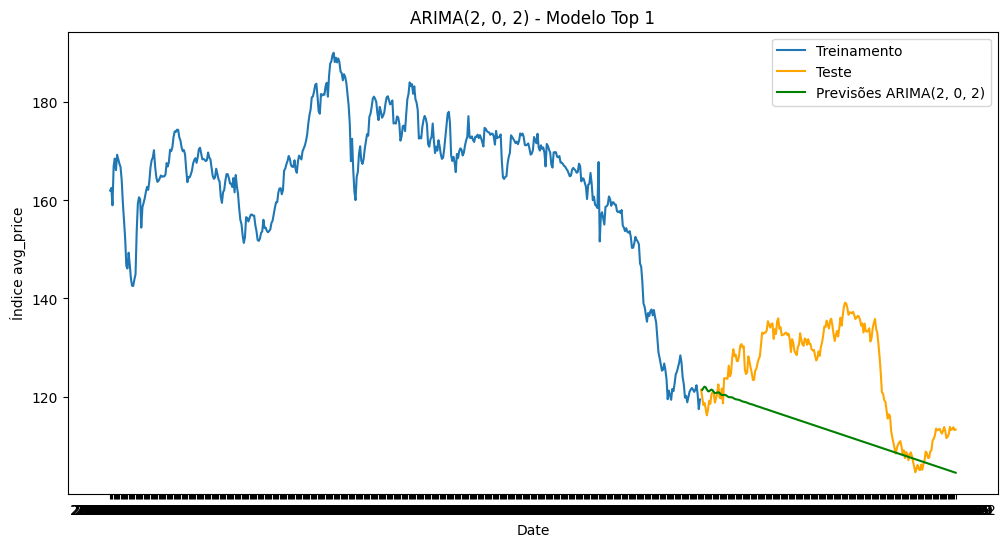

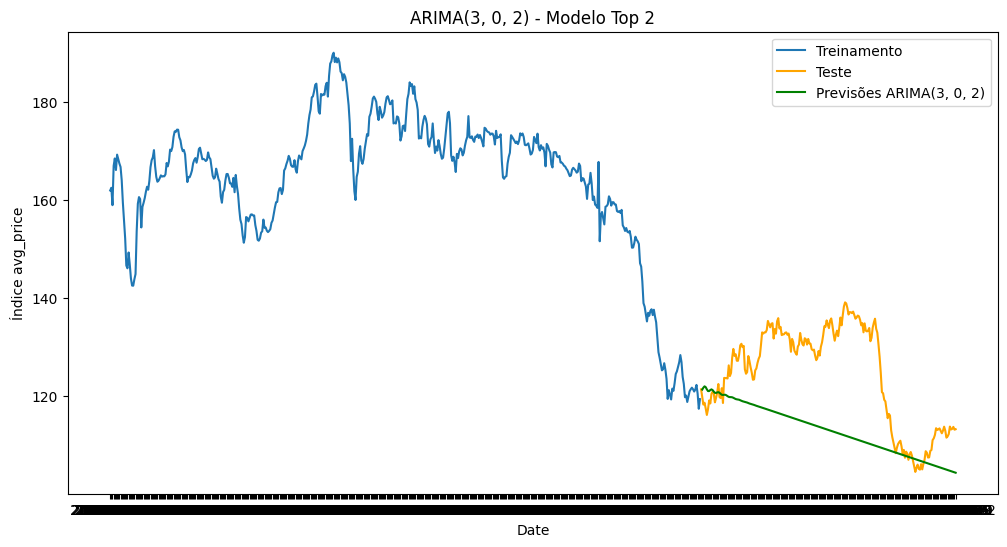

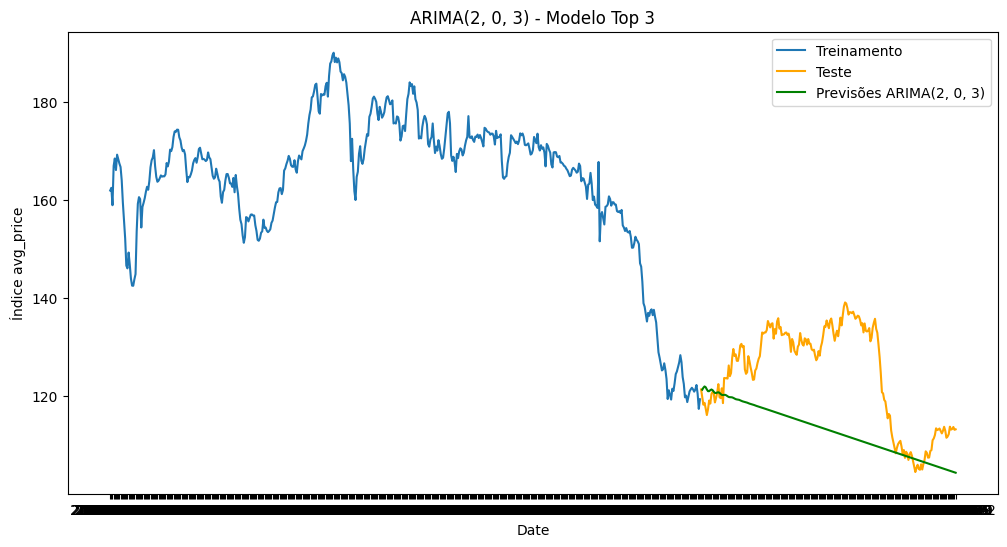

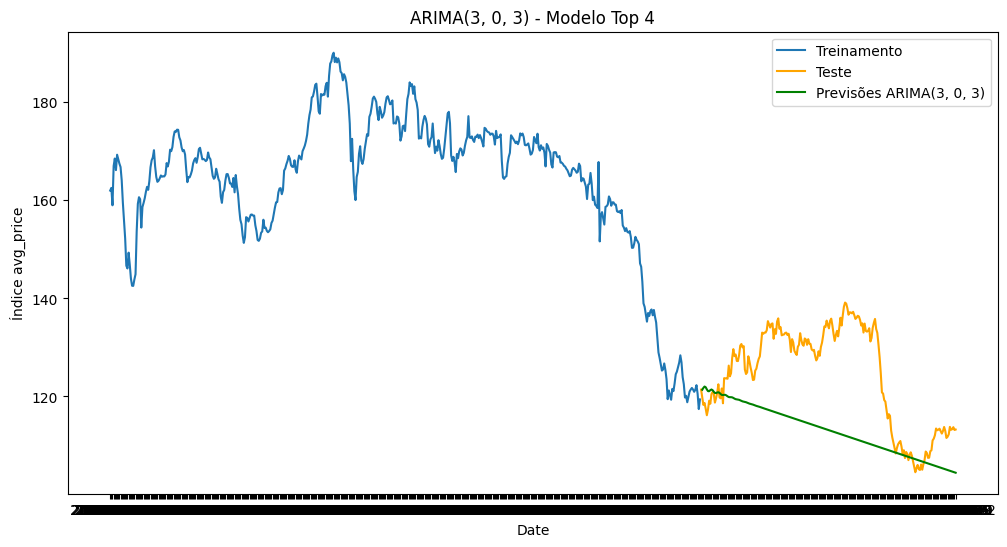

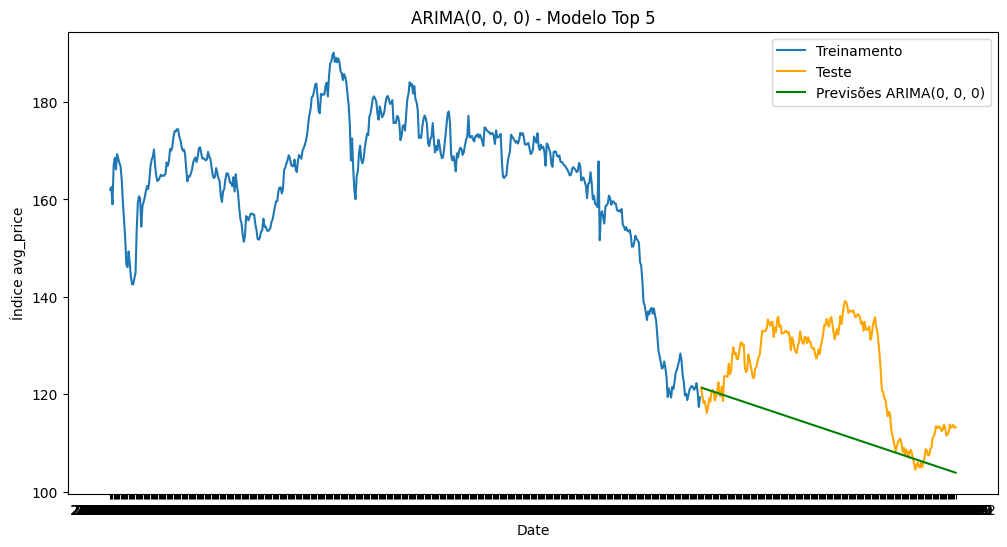

In [ ]:
# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(df_avg_price_original.index[:train_size], df_avg_price_original[:train_size], label='Treinamento')
# plt.plot(df_avg_price_original.index[train_size:], df_avg_price_original[train_size:], label='Teste', color='orange')
# plt.plot(predictions.index, predictions, label='predições', color='green')
# plt.xlabel('date')
# plt.ylabel('Índice avg_price')
# plt.title(f'ARIMA{best_order}')
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

# Plot para cada modelo nos cinco melhores
for i, (order, preds) in enumerate(model_predictions.items(), 1):
    plt.figure(figsize=(12, 6))
    plt.plot(df_avg_price_original.index[:train_size], df_avg_price_original[:train_size], label='Treinamento')
    plt.plot(df_avg_price_original.index[train_size:], df_avg_price_original[train_size:], label='Teste', color='orange')
    plt.plot(preds.index, preds, label=f'Previsões ARIMA{order}', color='green')
    plt.xlabel('Date')
    plt.ylabel('Índice avg_price')
    plt.title(f'ARIMA{order} - Modelo Top {i}')
    plt.legend()
    plt.show()



## SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [ ]:
df_estacionarias.columns

Index(['avg_price', 'ask', 'bid'], dtype='object')

In [ ]:
best_order = top_5_models[0][1]
best_order

(2, 0, 2)

In [ ]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [ ]:
# # df de avg_price diferenciada
# df_avg_price_diff = df_estacionarias['avg_price']

# # variáveis exógenas
# exogenous_vars = ['ask','bid']

# # dados de teste e treinamento
# train_size = int(len(df_avg_price_diff) * 0.7)
# train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
# train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# combinations_of_vars = [combo for combo in combinations(exogenous_vars, 2)]
# print("Minhas variáveis exógenas:", combinations_of_vars) # tem apenas uma combinação
# best_aic = np.inf
# # best_order = None
# best_model = None
# best_vars = None
# for combo in combinations_of_vars:
#     try:
#         print("Entrou aqui?", combo)
#         model = SARIMAX(endog=train_diff, order=best_order, exog=train_exog)
#         print("1")
#         model_fit = model.fit(disp=False)
#         aic = model_fit.aic
#         print("AIC:", aic)  
#         if aic < best_aic:
#             best_aic = aic
#             best_order = best_order #Usando o best order observado anteriormente (2, 0, 1)
#             best_model = model_fit
#             best_vars = combo
#     except Exception as e:
#         print(f'Erro: {e}')
#         continue

# print(f'O melhor modelo SARIMAX encontrado é: SARIMAX{best_order} com AIC={best_aic} e variáveis exógenas: {best_vars}')
# print(best_model.summary())

from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product, combinations
import numpy as np
import pandas as pd

# Série diferenciada de avg_price
df_avg_price_diff = df_estacionarias['avg_price']

# Variáveis exógenas
exogenous_vars = ['ask', 'bid']

# Divisão dos dados em treino e teste
train_size = int(len(df_avg_price_diff) * 0.7)
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# Parâmetros para testar
p_values = range(0, 4)
q_values = range(0, 4)
orders_to_try = list(product(p_values, [0], q_values))  # Mantendo d=0 para diferenciado de d=1

# Lista para armazenar os melhores modelos
sarimax_best_models = []

# Combinações de variáveis exógenas
combinations_of_vars = [combo for combo in combinations(exogenous_vars, len(exogenous_vars))]

# Loop para testar diferentes ordens e combinações de variáveis exógenas
for order in orders_to_try:
    for combo in combinations_of_vars:
        try:
            print(f"Tentando com ordem {order} e variáveis exógenas {combo}")
            
            # Treinar o modelo SARIMAX
            model = SARIMAX(endog=train_diff, order=order, exog=train_exog[list(combo)])
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            print("AIC:", aic)
            
            # Armazenar o modelo e seu AIC na lista
            sarimax_best_models.append((aic, order, model_fit, combo))
        
        except Exception as e:
            print(f"Erro para SARIMAX{order} com variáveis {combo}: {e}")
            continue

# Ordenar os modelos pelo AIC e pegar os 5 melhores
sarimax_best_models.sort(key=lambda x: x[0])  # Ordena pelo AIC
top_5_sarimax_models = sarimax_best_models[:5]  # Seleciona os 5 melhores

# Exibir os 5 melhores modelos
for i, (aic, order, model_fit, combo) in enumerate(top_5_sarimax_models, 1):
    print(f"\nTop {i}: SARIMAX{order} com AIC={aic} e variáveis exógenas: {combo}")
    print(model_fit.summary())


Tentando com ordem (0, 0, 0) e variáveis exógenas ('ask', 'bid')
AIC: 1636.3186195013786
Tentando com ordem (0, 0, 1) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

AIC: 1508.524853174914
Tentando com ordem (0, 0, 2) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1490.7974916909957
Tentando com ordem (0, 0, 3) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1489.7960796684717
Tentando com ordem (1, 0, 0) e variáveis exógenas ('ask', 'bid')
AIC: 1566.5319034362146
Tentando com ordem (1, 0, 1) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

AIC: 1486.556504517826
Tentando com ordem (1, 0, 2) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1488.1345867497428
Tentando com ordem (1, 0, 3) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

AIC: 1489.641858220451
Tentando com ordem (2, 0, 0) e variáveis exógenas ('ask', 'bid')
AIC: 1526.8459554364367
Tentando com ordem (2, 0, 1) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1488.266094986784
Tentando com ordem (2, 0, 2) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1490.4536963872606
Tentando com ordem (2, 0, 3) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

AIC: 1491.6848621905422
Tentando com ordem (3, 0, 0) e variáveis exógenas ('ask', 'bid')
AIC: 1513.771151939795
Tentando com ordem (3, 0, 1) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1489.1650261941609
Tentando com ordem (3, 0, 2) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting 

AIC: 1492.2569682182148
Tentando com ordem (3, 0, 3) e variáveis exógenas ('ask', 'bid')


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1491.6056647675805

Top 1: SARIMAX(1, 0, 1) com AIC=1486.556504517826 e variáveis exógenas: ('ask', 'bid')
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  513
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -738.278
Date:                Mon, 11 Nov 2024   AIC                           1486.557
Time:                        21:31:29   BIC                           1507.758
Sample:                             0   HQIC                          1494.867
                                - 513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ask            0.5972      0.031     19.262      0.000       0.536       0.658
bid            0.36

c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
train_exog.head()

,ask,bid
date,,
2021-03-10,0.00000,0.00000
2021-03-29,0.00000,0.00000
2021-06-01,0.00000,0.00000
2021-06-02,0.00000,0.00000
2021-06-04,1.48229,0.38932


In [ ]:
train_diff.head()

date
2021-03-10    0.550000
2021-03-29   -3.550000
2021-06-01    8.011668
2021-06-02    1.524999
2021-06-04   -2.361334
Name: avg_price, dtype: float64

In [ ]:
# # Predição dataset de teste
# predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# # retornar a diferenciação para obter as previsões no contexto original
# # Criar uma série vazia para as previsões invertidas
# predictions = pd.Series(index=test_diff.index, dtype=float)

# # Reverter a diferenciação  utilizando os valores da serie original
# for i in range(len(predictions_diff)):
#     if i == 0:
#         predictions.iloc[i] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[i]
#     else:
#         predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# # MSE
# mse = mean_squared_error(df['avg_price'][test_diff.index], predictions)
# print(f'Mean Squared Error (MSE): {mse}')


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Dicionários para armazenar as métricas de cada modelo
sarimax_predictions = {}
mse_results = {}
mae_results = {}
mape_results = {}

# Realizar a predição e calcular as métricas para cada um dos 5 melhores modelos SARIMAX
for i, (aic, order, model_fit, combo) in enumerate(top_5_sarimax_models, 1):
    print(f"\nExecutando predição com o modelo Top {i} - SARIMAX{order} e variáveis exógenas: {combo}")
    
    # Predição no conjunto de teste
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(combo)], dynamic=True)
    
    # Série vazia para previsões revertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação para obter as previsões no contexto original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Armazenar previsões
    sarimax_predictions[order] = predictions
    
    # Calcular MSE, MAE e MAPE
    y_true = df['avg_price'][test_diff.index]
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100  # MAPE em porcentagem
    
    # Armazenar as métricas para cada modelo
    mse_results[order] = mse
    mae_results[order] = mae
    mape_results[order] = mape
    
    # Exibir as métricas para cada modelo
    print(f"\nMétricas para SARIMAX{order} e variáveis exógenas {combo}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Exibir o resumo das métricas dos cinco melhores modelos
print("\nResumo das métricas dos cinco melhores modelos SARIMAX:")
for order in mse_results.keys():
    print(f"\nSARIMAX{order}:")
    print(f"MSE = {mse_results[order]}")
    print(f"MAE = {mae_results[order]}")
    print(f"MAPE = {mape_results[order]:.2f}%")


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Executando predição com o modelo Top 1 - SARIMAX(1, 0, 1) e variáveis exógenas: ('ask', 'bid')


MissingDataError: exog contains inf or nans

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


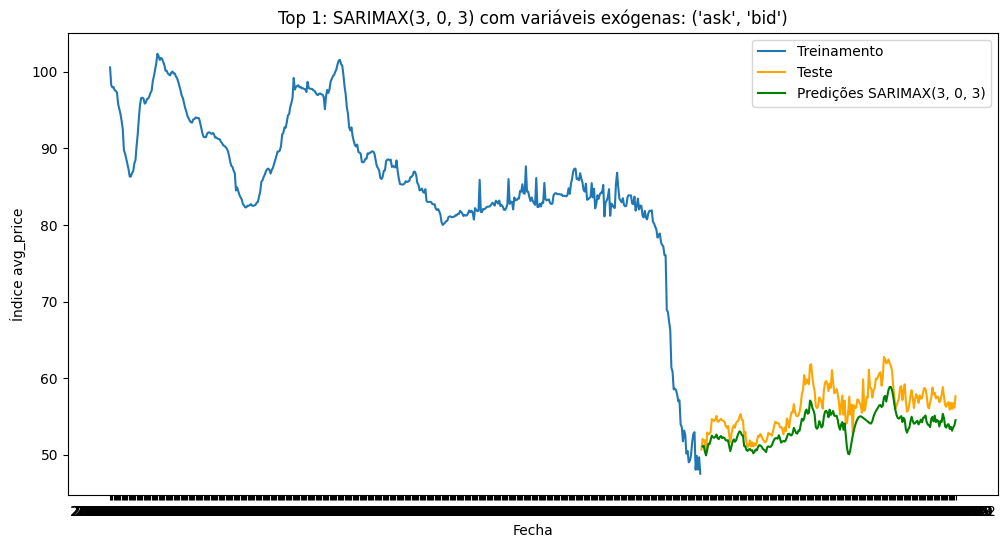

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


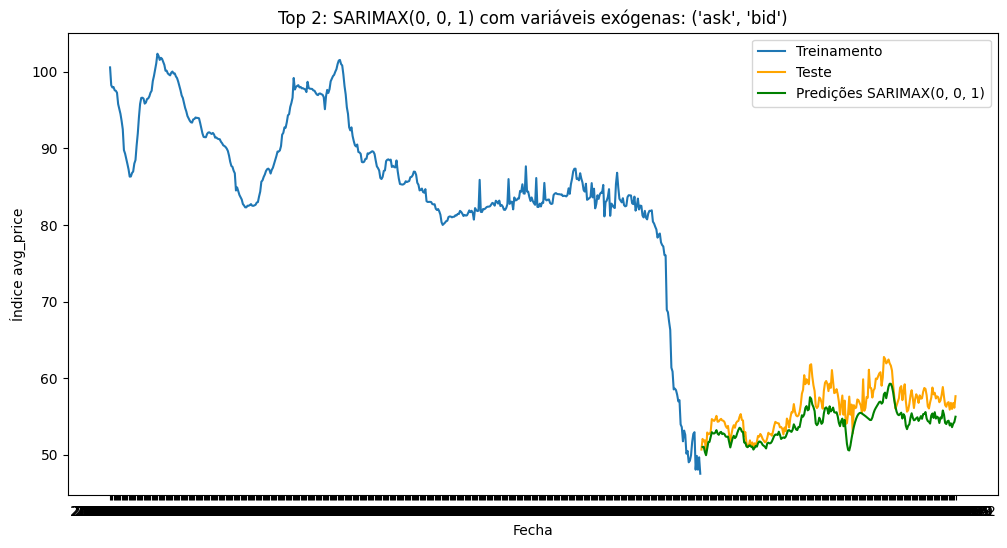

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


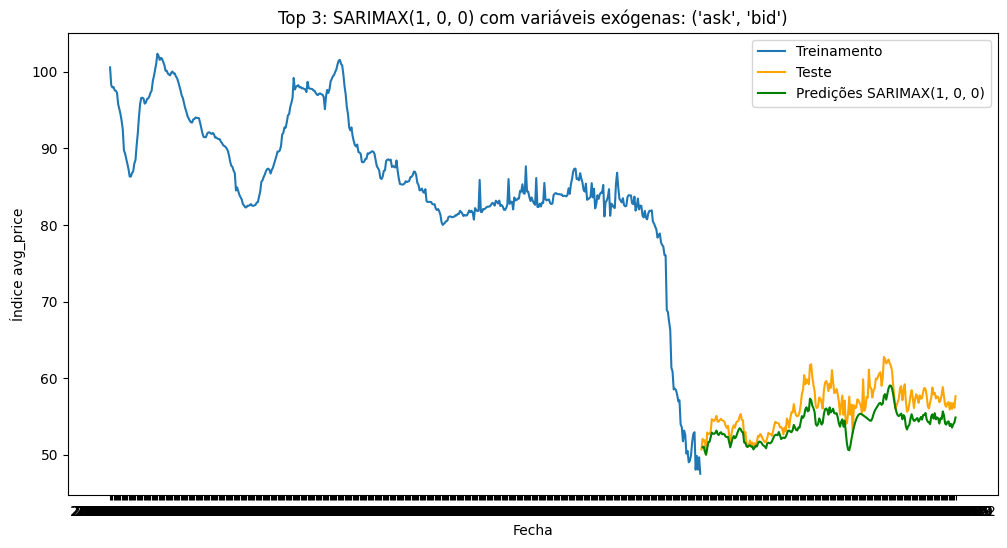

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


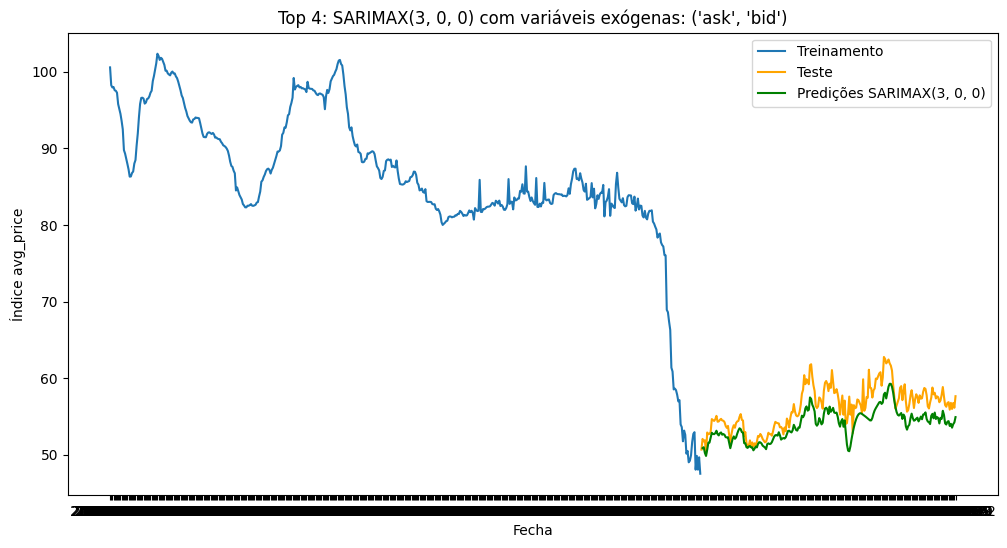

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


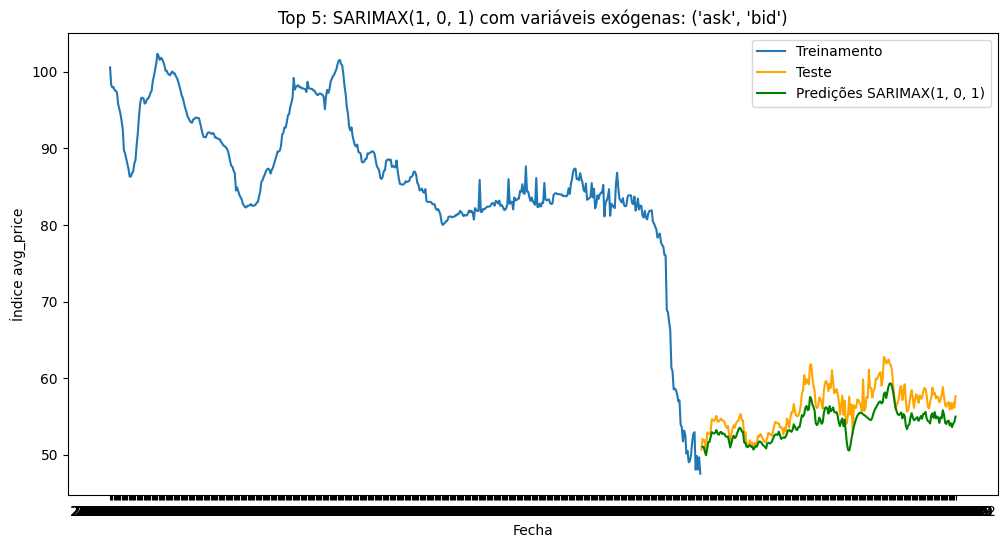

In [ ]:
# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
# plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
# plt.plot(predictions.index, predictions, label='Predições', color='green')
# plt.xlabel('Fecha')
# plt.ylabel('Índice avg_price')
# plt.title(f'Predições modelo SARIMAX{best_order} com variaveis exógenas: {best_vars}')	
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

# Plot para cada um dos 5 melhores modelos SARIMAX
for i, (aic, order, model_fit, combo) in enumerate(top_5_sarimax_models, 1):
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(combo)], dynamic=True)
    
    # Série vazia para previsões invertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação usando a série original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
    plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
    plt.plot(predictions.index, predictions, label=f'Predições SARIMAX{order}', color='green')
    plt.xlabel('Fecha')
    plt.ylabel('Índice avg_price')
    plt.title(f'Top {i}: SARIMAX{order} com variáveis exógenas: {combo}')
    plt.legend()
    plt.show()


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


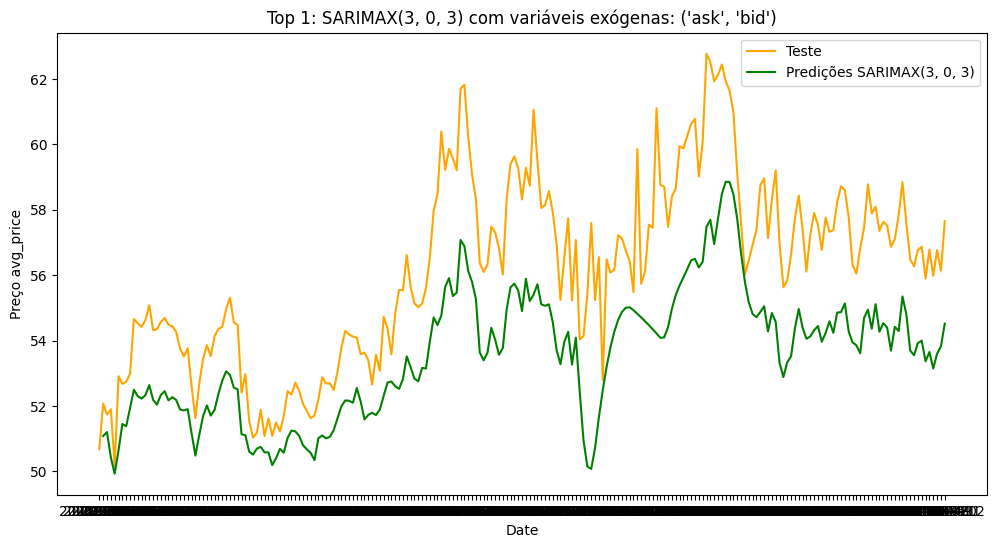

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


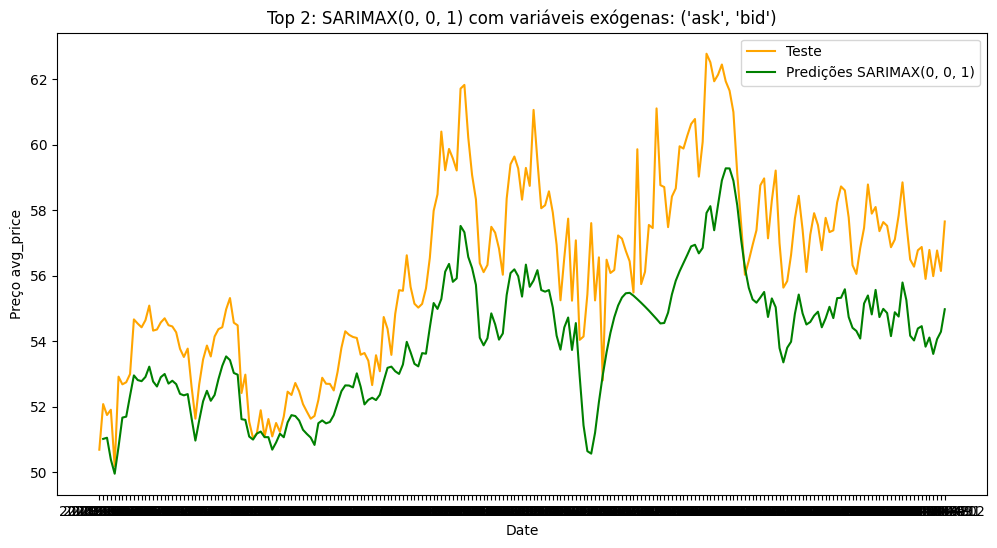

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


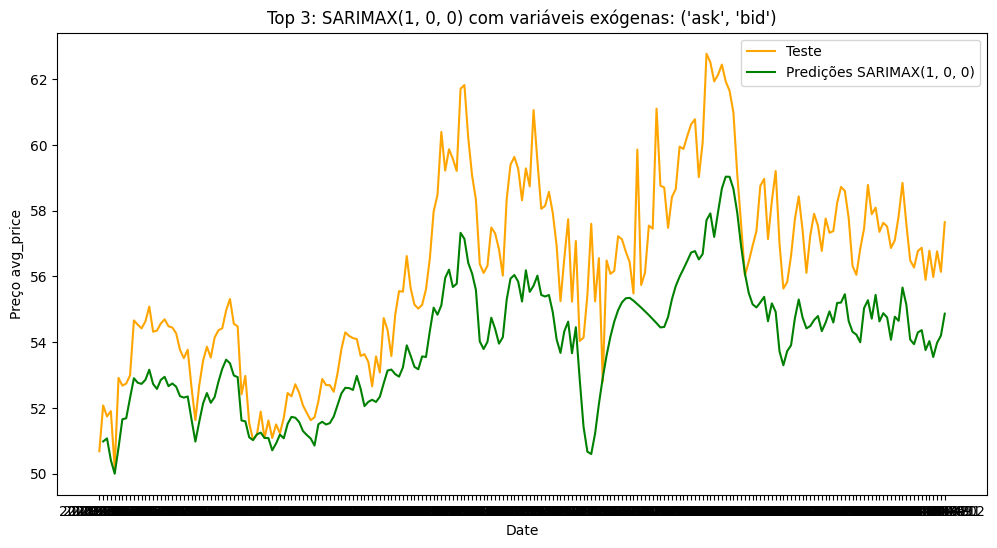

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


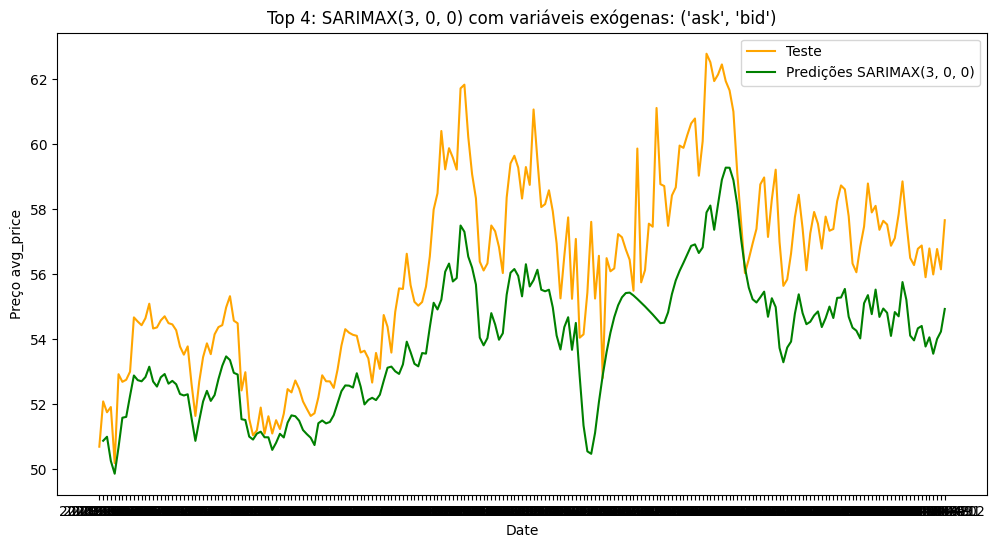

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


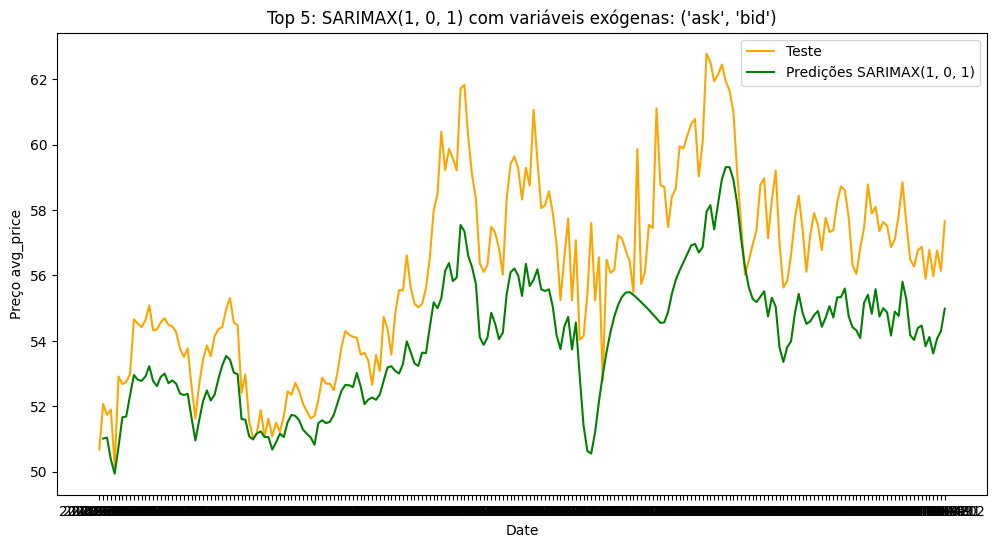

In [ ]:
import matplotlib.pyplot as plt

# Plot para cada um dos 5 melhores modelos SARIMAX
for i, (aic, order, model_fit, combo) in enumerate(top_5_sarimax_models, 1):
    # Gerar predições diferenciadas
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(combo)], dynamic=True)
    
    # Série vazia para previsões invertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação para a escala original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
    plt.plot(predictions.index, predictions, label=f'Predições SARIMAX{order}', color='green')
    plt.xlabel('Date')
    plt.ylabel('Preço avg_price')
    plt.title(f'Top {i}: SARIMAX{order} com variáveis exógenas: {combo}')
    plt.legend()
    plt.show()


# Fator Sazonal

In [ ]:
# # avg_price diferenciado por estacionariedade
# df_avg_price_diff = df_estacionarias['avg_price']

# # Variaveis exógenas
# exogenous_vars = ['ask', 'bid']

# train_size = int(len(df_avg_price_diff) * 0.7) # mesma divisão anterior de 70% para treino e 30% para teste
# train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
# train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# best_aic = np.inf
# # best_order = None
# best_seasonal_order = None
# best_model = None
# best_vars = None

# # Parâmetro de sazonalidade
# seasonal_p = range(0, 2)
# seasonal_d = [0, 1]
# seasonal_q = range(0, 2)
# seasonal_s = [5, 7]

# for sp in seasonal_p:
#   for sd in seasonal_d:
#     for sq in seasonal_q:
#       for ss in seasonal_s:

#         model = SARIMAX(train_diff, order=best_order, seasonal_order=(sp, sd, sq, ss), exog=train_exog[exogenous_vars])
#         model_fit = model.fit(disp=False)
#         aic = model_fit.aic
#         if aic < best_aic:
#             best_aic = aic
#             best_order = best_order
#             best_seasonal_order = (sp, sd, sq, ss)
#             best_model = model_fit
#             best_vars = exogenous_vars


# print(f'O melhor modelo SARIMAX: SARIMAX{best_order} con orden sazonal {best_seasonal_order}, AIC={best_aic} e variáveis exógenas: {best_vars}')
# print(best_model.summary())

from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import numpy as np

# Série diferenciada de avg_price
df_avg_price_diff = df_estacionarias['avg_price']

# Variáveis exógenas
exogenous_vars = ['ask', 'bid']

# Divisão dos dados em treino e teste
train_size = int(len(df_avg_price_diff) * 0.7)
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# Parâmetros de sazonalidade
seasonal_p = range(0, 2)
seasonal_d = [0, 1]
seasonal_q = range(0, 2)
seasonal_s = [5, 7]  # Frequência sazonal, ex. semanal (7 dias) ou quinzenal (5 dias)

# Parâmetro de order base (best_order dos top 5 do ARIMA ou outro valor adequado)
p, d, q = best_order

# Lista para armazenar os melhores modelos
best_seasonal_models = []

# Loop para testar diferentes ordens sazonais e combinações de variáveis exógenas
for sp, sd, sq, ss in product(seasonal_p, seasonal_d, seasonal_q, seasonal_s):
    try:
        print(f"Tentando SARIMAX com ordem sazonal ({sp}, {sd}, {sq}, {ss}) e variáveis exógenas {exogenous_vars}")
        
        # Treinar o modelo SARIMAX com sazonalidade
        model = SARIMAX(train_diff, order=(p, d, q), seasonal_order=(sp, sd, sq, ss), exog=train_exog[exogenous_vars])
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        
        # Armazenar o modelo e seu AIC na lista
        best_seasonal_models.append((aic, (p, d, q), (sp, sd, sq, ss), model_fit, exogenous_vars))
        
    except Exception as e:
        print(f"Erro ao treinar SARIMAX com sazonalidade ({sp}, {sd}, {sq}, {ss}): {e}")
        continue

# Ordenar os modelos pelo AIC e pegar os 5 melhores
best_seasonal_models.sort(key=lambda x: x[0])  # Ordena pelo AIC
top_5_seasonal_models = best_seasonal_models[:5]  # Seleciona os 5 melhores

# Exibir os 5 melhores modelos
for i, (aic, order, seasonal_order, model_fit, vars) in enumerate(top_5_seasonal_models, 1):
    print(f"\nTop {i}: SARIMAX{order} com ordem sazonal {seasonal_order}, AIC={aic}, e variáveis exógenas: {vars}")
    print(model_fit.summary())

Tentando SARIMAX com ordem sazonal (0, 0, 0, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 0, 0, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 0, 1, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 0, 1, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 1, 0, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 1, 0, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 1, 1, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (0, 1, 1, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 0, 0, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 0, 0, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 0, 1, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 0, 1, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 1, 0, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 1, 0, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 1, 1, 5) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa

Tentando SARIMAX com ordem sazonal (1, 1, 1, 7) e variáveis exógenas ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespa


Top 1: SARIMAX(2, 0, 1) com ordem sazonal (0, 0, 0, 5), AIC=1170.9104107408996, e variáveis exógenas: ['ask', 'bid']
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  512
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -579.455
Date:                Wed, 06 Nov 2024   AIC                           1170.910
Time:                        16:37:51   BIC                           1196.340
Sample:                             0   HQIC                          1180.879
                                - 512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ask            0.3900      0.025     15.516      0.000       0.341       0.439
bid          

In [ ]:
# # Realizar predições no conjunto de teste	
# predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# # Inverter a diferenciação para obter as previsões no contexto original
# # Criar uma série vazia para as previsões invertidas
# predictions = pd.Series(index=test_diff.index, dtype=float)

# # Reverter a diferenciação  utilizando os valores da serie original
# for i in range(len(predictions_diff)):
#     if i == 0:
#         predictions.iloc[i] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[i]
#     else:
#         predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# # Métrica de erro (MSE)
# mse = mean_squared_error(df['avg_price'][test_diff.index], predictions)
# print(f'Mean Squared Error (MSE): {mse}')


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Dicionários para armazenar as métricas de cada modelo
seasonal_predictions = {}
mse_results = {}
mae_results = {}
mape_results = {}

# Realizar predições e calcular as métricas para cada um dos 5 melhores modelos SARIMAX com sazonalidade
for i, (aic, order, seasonal_order, model_fit, vars) in enumerate(top_5_seasonal_models, 1):
    print(f"\nExecutando predição com o modelo Top {i} - SARIMAX{order} com ordem sazonal {seasonal_order} e variáveis exógenas: {vars}")
    
    # Realizar predições no conjunto de teste
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(vars)], dynamic=True)
    
    # Série vazia para previsões revertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação para a escala original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Armazenar previsões
    seasonal_predictions[(order, seasonal_order)] = predictions
    
    # Calcular MSE, MAE e MAPE
    y_true = df['avg_price'][test_diff.index]
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100  # MAPE em porcentagem
    
    # Armazenar as métricas para cada modelo
    mse_results[(order, seasonal_order)] = mse
    mae_results[(order, seasonal_order)] = mae
    mape_results[(order, seasonal_order)] = mape
    
    # Exibir as métricas para cada modelo
    print(f"\nMétricas para SARIMAX{order} com sazonalidade {seasonal_order} e variáveis exógenas {vars}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Exibir o resumo das métricas dos cinco melhores modelos
print("\nResumo das métricas dos cinco melhores modelos SARIMAX com sazonalidade:")
for (order, seasonal_order) in mse_results.keys():
    print(f"\nSARIMAX{order} com sazonalidade {seasonal_order}:")
    print(f"MSE = {mse_results[(order, seasonal_order)]}")
    print(f"MAE = {mae_results[(order, seasonal_order)]}")
    print(f"MAPE = {mape_results[(order, seasonal_order)]:.2f}%")




Executando predição com o modelo Top 1 - SARIMAX(2, 0, 1) com ordem sazonal (0, 0, 0, 5) e variáveis exógenas: ['ask', 'bid']


c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Métricas para SARIMAX(2, 0, 1) com sazonalidade (0, 0, 0, 5) e variáveis exógenas ['ask', 'bid']:
Mean Squared Error (MSE): 6.113687757947703
Mean Absolute Error (MAE): 2.166636651577597
Mean Absolute Percentage Error (MAPE): 3.78%

Executando predição com o modelo Top 2 - SARIMAX(2, 0, 1) com ordem sazonal (0, 0, 0, 7) e variáveis exógenas: ['ask', 'bid']

Métricas para SARIMAX(2, 0, 1) com sazonalidade (0, 0, 0, 7) e variáveis exógenas ['ask', 'bid']:
Mean Squared Error (MSE): 6.113687757947703
Mean Absolute Error (MAE): 2.166636651577597
Mean Absolute Percentage Error (MAPE): 3.78%

Executando predição com o modelo Top 3 - SARIMAX(2, 0, 1) com ordem sazonal (1, 0, 1, 5) e variáveis exógenas: ['ask', 'bid']

Métricas para SARIMAX(2, 0, 1) com sazonalidade (1, 0, 1, 5) e variáveis exógenas ['ask', 'bid']:
Mean Squared Error (MSE): 10.74019479933555
Mean Absolute Error (MAE): 3.014554594274935
Mean Absolute Percentage Error (MAPE): 5.28%

Executando predição com o modelo Top 4 - SARIM

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: 

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


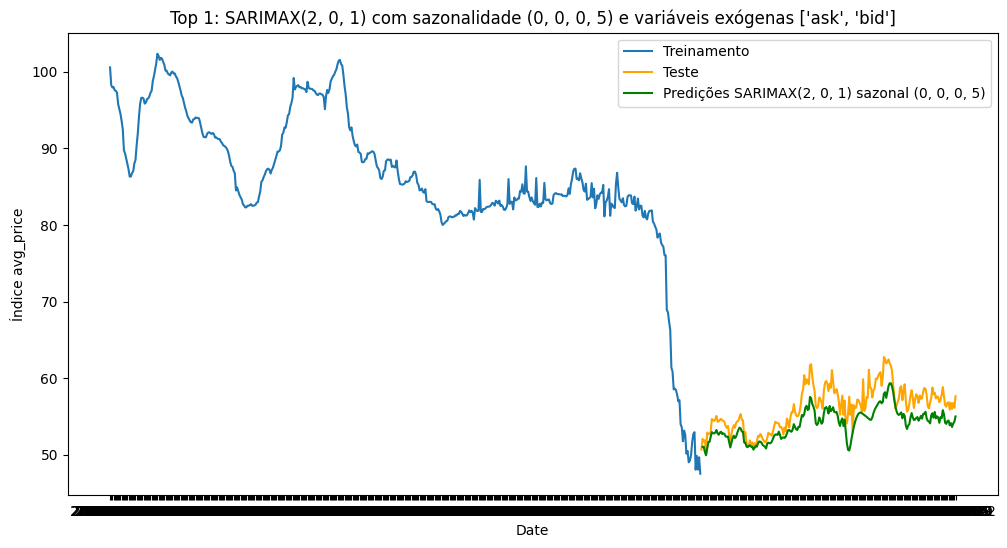

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


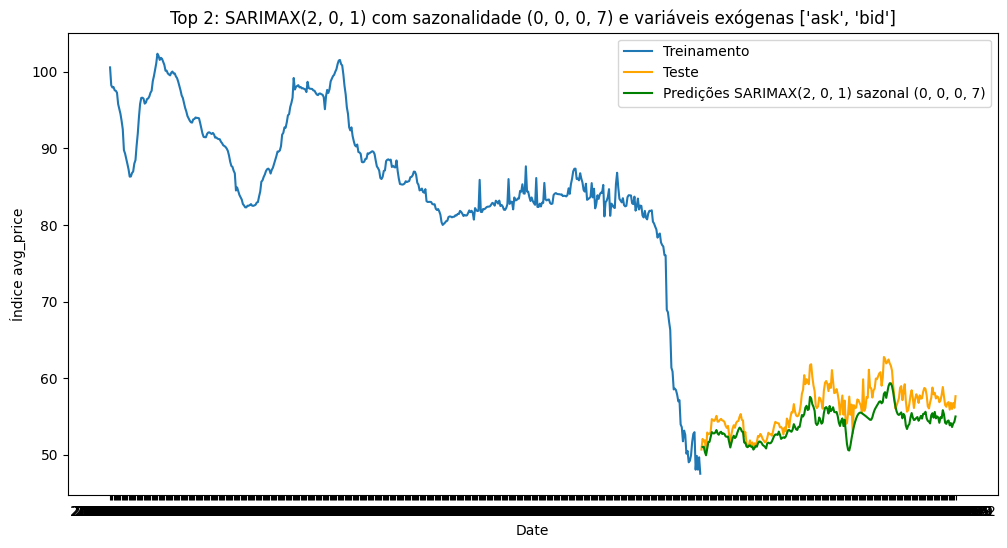

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


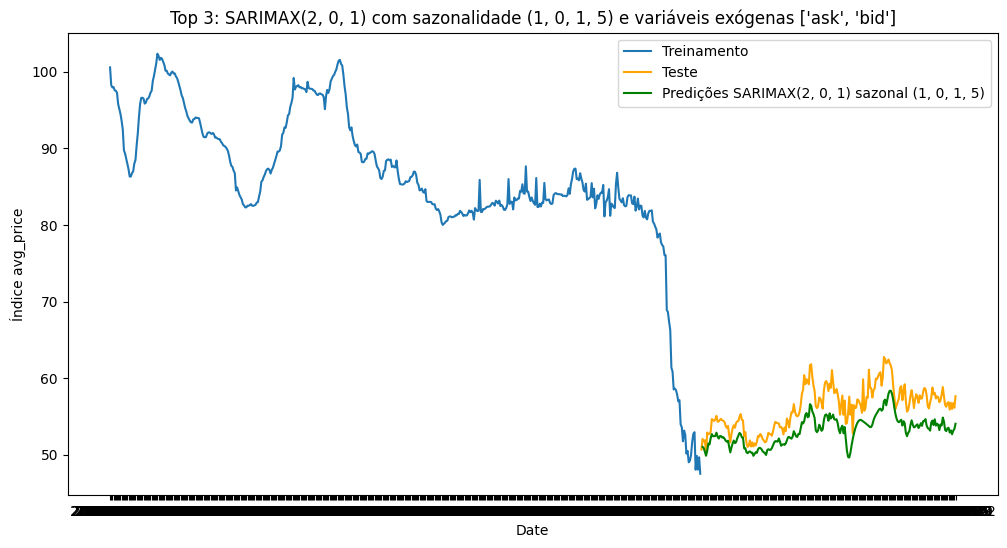

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


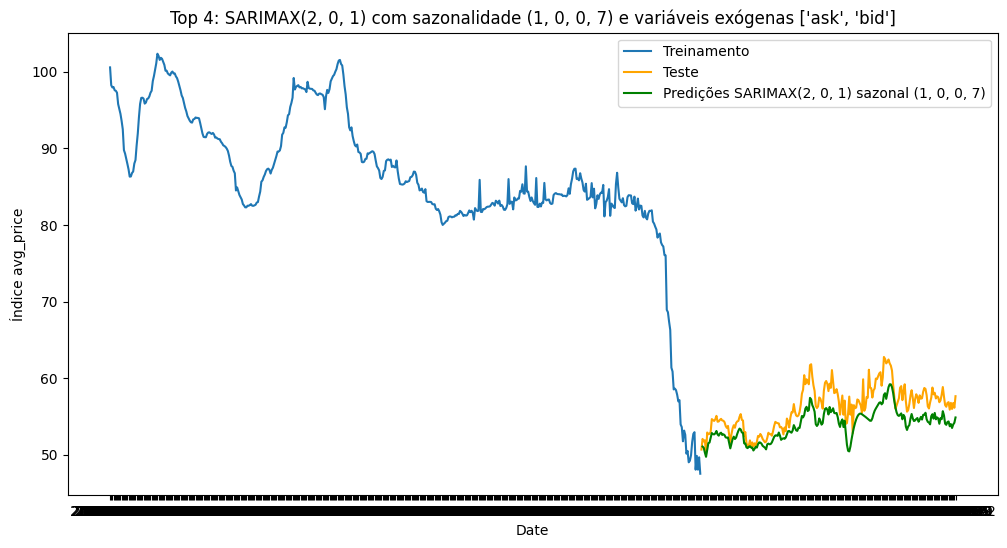

c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Guilherme Hachimine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


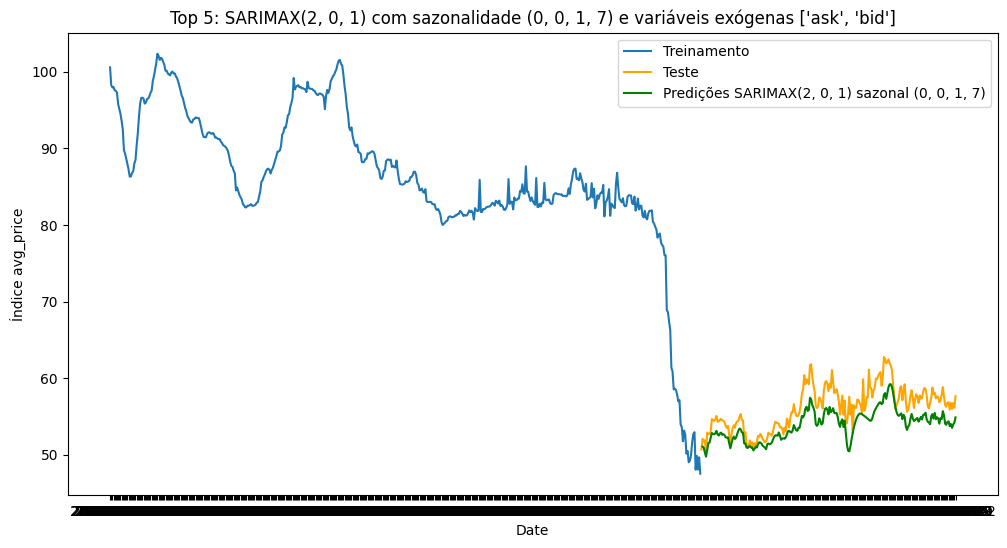

In [ ]:
# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
# plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
# plt.plot(predictions.index, predictions, label='Predições', color='green')
# plt.xlabel('date')
# plt.ylabel('Índice avg_price')
# plt.title(f'Predição com modelo SARIMAX{best_order} com ordem sazonal de {best_seasonal_order} e variáveis exógenas {best_vars}')	
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

# Plot para cada um dos 5 melhores modelos SARIMAX
for i, (aic, order, seasonal_order, model_fit, vars) in enumerate(top_5_seasonal_models, 1):
    # Realizar predições diferenciadas
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(vars)], dynamic=True)
    
    # Série vazia para previsões revertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação para a escala original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Treinamento')
    plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
    plt.plot(predictions.index, predictions, label=f'Predições SARIMAX{order} sazonal {seasonal_order}', color='green')
    plt.xlabel('Date')
    plt.ylabel('Índice avg_price')
    plt.title(f'Top {i}: SARIMAX{order} com sazonalidade {seasonal_order} e variáveis exógenas {vars}')
    plt.legend()
    plt.show()


In [ ]:
# # Somente período de teste
# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
# plt.plot(predictions.index, predictions, label='Predição', color='green')
# plt.xlabel('date')
# plt.ylabel('Valor avg_price')
# plt.title(f'Predição com modelo SARIMAX{best_order} com ordem sazonal de {best_seasonal_order} e variáveis exógenas {best_vars}')	
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

# Plot para cada um dos 5 melhores modelos SARIMAX (apenas período de teste)
for i, (aic, order, seasonal_order, model_fit, vars) in enumerate(top_5_seasonal_models, 1):
    # Realizar predições diferenciadas
    predictions_diff = model_fit.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(vars)], dynamic=True)
    
    # Série vazia para previsões revertidas
    predictions = pd.Series(index=test_diff.index, dtype=float)

    # Reverter a diferenciação para a escala original
    for j in range(len(predictions_diff)):
        if j == 0:
            predictions.iloc[j] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[j]
        else:
            predictions.iloc[j] = predictions.iloc[j - 1] + predictions_diff.iloc[j]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Teste', color='orange')
    plt.plot(predictions.index, predictions, label=f'Predições SARIMAX{order} sazonal {seasonal_order}', color='green')
    plt.xlabel('date')
    plt.ylabel('Valor avg_price')
    plt.title(f'Top {i}: Predição com SARIMAX{order} com sazonalidade {seasonal_order} e variáveis exógenas {vars}')
    plt.legend()
    plt.show()


# Recurrent Neural Network (RNN)

## LSTM

LSTM

In [ ]:
datos = df[['avg_price', 'ask', 'bid']]
datos.head()

In [ ]:
# Split data
size = int(len(datos)*0.7) # 70% para treinamento e 30% para teste
X_train, X_test = datos.iloc[:size], datos.iloc[size:]

In [ ]:
# Datos de entrenamiento
y_train = X_train['avg_price'][1:].values
exog_train = X_train[['ask', "bid"]][1:].values

In [ ]:
import datetime

# Garantir que as datas estejam no formato datetime
start_date = datos.iloc[len(X_train)].name
end_date = datos.iloc[-1].name

# Se 'start_date' ou 'end_date' forem strings, convertê-los para datetime primeiro
if isinstance(start_date, str):
    start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
if isinstance(end_date, str):
    end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Formatar para string no formato desejado
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

# Extrair os dados para y_test e exog_test
y_test = X_test['avg_price'][start_date:end_date].values
exog_test = X_test[['ask', 'bid']][start_date:end_date].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshaping dados de treinamento e teste
scaler_y = MinMaxScaler(feature_range=(0, 1))
# obtendo valores escalados
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
scaler_exog = MinMaxScaler(feature_range=(0, 1))
exog_train_scaled = scaler_exog.fit_transform(exog_train)
exog_test_scaled = scaler_exog.transform(exog_test)

In [ ]:
# Hashing y_train_scaled e exog_train_scaled
train_data = np.hstack((y_train_scaled, exog_train_scaled))
test_data = np.hstack((y_test_scaled, exog_test_scaled))

In [ ]:
# # Sequenciar dados
# def create_sequences(data, seq_length):
#     X = []
#     y = []
#     for i in range(seq_length, len(data)):
#         X.append(data[i-seq_length:i])
#         y.append(data[i, 0])  
#     return np.array(X), np.array(y)

In [ ]:
#how many days foward to predict
prediction_days = 1

def create_sequences(scaled_data,prediction_days):
  x_train=[]
  y_train=[]
  print("type of scaled_data",type(scaled_data))
  for x in range(prediction_days, len(scaled_data)):
      x_train.append(scaled_data[x-prediction_days:x, 0])
      y_train.append(scaled_data[x, 0])
  return x_train,y_train

In [ ]:
# seq_length = 60
seq_length = 1
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

#reshape x_train
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
#Build the Model 4 LAYERS
def create_model_LSTM(X_train):
    model = Sequential()    
    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    print("Type of X_train", type(X_train))
    model.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=75))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=200, batch_size=32)
    return model, history

model, history = create_model_LSTM(X_train)

In [ ]:
history = model 
history

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Definir el modelo LSTM
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# model.compile(optimizer='adam', loss='mean_squared_error')

# # Entrenar el modelo
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# history

In [ ]:
model.summary()

In [ ]:
# Predict
predictions_scaled = model.predict(X_test)

# inverter a escala dos valores previstos
predictions = scaler_y.inverse_transform(predictions_scaled)

# desnormalizar y_test
y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# DF com resultados previstos e reais
df_results = pd.DataFrame({
    'Real': y_test_descaled.flatten(),
    'Predicted': predictions.flatten()
})

df_results

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# REAL
plt.plot(df_results.index, df_results['Real'], label='Valor Real', color='blue')

# PREDICTED
plt.plot(df_results.index, df_results['Predicted'], label='Valor previsto', color='red')

plt.title('Predição LSTM')
plt.xlabel('date')
plt.ylabel('avg_price')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_descaled, predictions)
mae = mean_absolute_error(y_test_descaled, predictions)
mape = np.mean(np.abs((y_test_descaled - predictions) / y_test_descaled)) * 100

print(f'Mean Squared error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}') # Mean Absolute Error
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%') # Mean Absolute Percentage Error


In [ ]:
# Função para remover a escala dos dados
def descaler(scaled_data, scaler, original_shape):
    scaled_data_reshaped = scaled_data.reshape(-1, 1)
    descaled_data = scaler.inverse_transform(np.concatenate((scaled_data_reshaped, np.zeros((scaled_data_reshaped.shape[0], original_shape - 1))), axis=1))
    return descaled_data[:, 0]

In [ ]:
# Predição no conjunto de treinamento
train_predictions = model.predict(X_train)

# Tirar escalas das previsões do conjunto de treinamento
train_predictions_descaled = descaler(train_predictions, scaler_y, len(series))

# tirar escalas dos valores reais do conjunto de treinamento
y_train_descaled = descaler(y_train, scaler_y, len(series))

# Calculo de MSE, MAE e MAPE para o conjunto de treinamento
train_mse = mean_squared_error(y_train_descaled, train_predictions_descaled)
train_mae = mean_absolute_error(y_train_descaled, train_predictions_descaled)
train_mape = np.mean(np.abs((y_train_descaled - train_predictions_descaled) / y_train_descaled)) * 100

print(f'Mean Squared Error (MSE) de treinamento: {train_mse}') # Mean Squared Error
print(f'Mean Absolute Error (MAE) de treinamento: {train_mae}') # Mean Absolute Error
print(f'Mean Absolute Percentage Error (MAPE) de treinamento: {train_mape:.2f}%') # Mean Absolute Percentage Error